# Project: Building a Restaurant Recommendation System

# **Name of people who have worked on this homework:**

Abhijeet Dubey, Gunaseelan D, Pavan Kumar S, Nagapriya M, Rahul Pathak


# **Table Of Contents**
* Loading the Data into Dataframes
* Analyzing the Data
* Explonatory Data Analysis
* Modeling
    * K-Nearest Neighbours model (KNN) 
    * Collaboritive Filtering - Using Rating - using Neural Netowrk
    * Improvements in the Model (Matrix Fatorization) using review text

In [239]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegressionCV
import sklearn.metrics as metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score
import json
from sklearn.tree import export_graphviz
from IPython.display import Image
from IPython.display import display
from IPython.display import display, Math, Latex
import seaborn as sns
%matplotlib inline

# **Loading the Data into Dataframes**

We have five data sets in json format: Business, Reviews, User, Checking and tips.

As we have large amounf data so we are loading data line by line in dataframe business_df, review_df, user_df, checkin_df & tip_df

In [240]:
#Define function to read data line by line
def readjson(filepath):
    data = []
    i=0
    with open(filepath,encoding="utf8") as f:
            for line in f:
                 if i<100000:
                    data.append(json.loads(line))
                    #print(i)
                    i +=1
    return pd.DataFrame(data)

business_df = readjson('yelp_academic_dataset_business.json')
review_df = readjson('yelp_academic_dataset_review.json')
user_df = readjson('yelp_academic_dataset_user.json')
checkin_df = readjson('yelp_academic_dataset_checkin.json')
tip_df = readjson('yelp_academic_dataset_tip.json')

# **Analyzing all the Data**

In [241]:
business_df.head(10)

business_id                          name  \
0  f9NumwFMBDn751xgFiRbNA      The Range At Lake Norman   
1  Yzvjg0SayhoZgCljUJRF9Q             Carlos Santo, NMD   
2  XNoUzKckATkOD1hP6vghZg                       Felinus   
3  6OAZjbxqM5ol29BuHsil3w          Nevada House of Hose   
4  51M2Kk903DFYI6gnB5I6SQ       USE MY GUY SERVICES LLC   
5  cKyLV5oWZJ2NudWgqs8VZw   Oasis Auto Center - Gilbert   
6  oiAlXZPIFm2nBCt0DHLu_Q          Green World Cleaners   
7  ScYkbYNkDgCneBrD9vqhCQ  Junction Tire & Auto Service   
8  pQeaRpvuhoEqudo3uymHIQ           The Empanadas House   
9  EosRKXIGeSWFYWwpkbhNnA                Xtreme Couture   

                        address             city state postal_code   latitude  \
0               10913 Bailey Rd        Cornelius    NC       28031  35.462724   
1     8880 E Via Linda, Ste 107       Scottsdale    AZ       85258  33.569404   
2         3554 Rue Notre-Dame O         Montreal    QC     H4C 1P4  45.479984   
3                1015 Sharp Cir  North Las Vegas    NV       89030  36.219728   
4            4827 E Downing Cir             Mesa    AZ       85205  33.428065   
5     1720 W Elliot Rd, Ste 105          Gilbert    AZ       85233  33.350399   
6  6870 S Rainbow Blvd, Ste 117        Las Vegas    NV       89118  36.063977   
7           6910 E Southern Ave             Mesa    AZ       85209  33.393885   
8                404 E Green St        Champaign    IL       61820  40.110446   
9  700 Kipling Avenue Etobicoke          Toronto    ON     M8Z 5G3  43.624539   

    longitude  stars  review_count  is_open  \
0  -80.852612    3.5            36        1   
1 -111.890264    5.0             4        1   
2  -73.580070    5.0             5        1   
3 -115.127725    2.5             3        0   
4 -111.726648    4.5            26        1   
5 -111.827142    4.5            38        1   
6 -115.241463    3.5            81        1   
7 -111.682226    5.0            18        1   
8  -88.233073    4.5             5        1   
9  -79.529108    3.0            16        1   

                                          attributes  \
0  {'BusinessAcceptsCreditCards': 'True', 'BikePa...   
1  {'GoodForKids': 'True', 'ByAppointmentOnly': '...   
2                                               None   
3  {'BusinessAcceptsCreditCards': 'True', 'ByAppo...   
4  {'BusinessAcceptsCreditCards': 'True', 'ByAppo...   
5             {'BusinessAcceptsCreditCards': 'True'}   
6  {'BusinessParking': '{'garage': False, 'street...   
7  {'BusinessAcceptsCreditCards': 'True', 'ByAppo...   
8  {'RestaurantsAttire': 'u'casual'', 'Restaurant...   
9  {'GoodForKids': 'True', 'ByAppointmentOnly': '...   

                                          categories  \
0  Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...   
1  Health & Medical, Fitness & Instruction, Yoga,...   
2                   Pets, Pet Services, Pet Groomers   
3  Hardware Stores, Home Services, Building Suppl...   
4  Home Services, Plumbing, Electricians, Handyma...   
5  Auto Repair, Automotive, Oil Change Stations, ...   
6  Dry Cleaning & Laundry, Local Services, Laundr...   
7  Auto Repair, Oil Change Stations, Automotive, ...   
8  Ethnic Food, Food Trucks, Specialty Food, Impo...   
9  Martial Arts, Gyms, Fitness & Instruction, Act...   

                                               hours  
0  {'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'...  
1                                               None  
2                                               None  
3  {'Monday': '7:0-16:0', 'Tuesday': '7:0-16:0', ...  
4  {'Monday': '0:0-0:0', 'Tuesday': '9:0-16:0', '...  
5  {'Monday': '7:0-18:0', 'Tuesday': '7:0-18:0', ...  
6  {'Monday': '7:0-19:0', 'Tuesday': '7:0-19:0', ...  
7  {'Monday': '7:30-17:0', 'Tuesday': '7:30-17:0'...  
8  {'Monday': '11:30-14:30', 'Tuesday': '11:30-14...  
9  {'Monday': '5:30-23:0', 'Tuesday': '5:30-23:0'...

In [242]:
review_df.head()

review_id                 user_id             business_id  \
0  xQY8N_XvtGbearJ5X4QryQ  OwjRMXRC0KyPrIlcjaXeFQ  -MhfebM0QIsKt87iDN-FNw   
1  UmFMZ8PyXZTY2QcwzsfQYA  nIJD_7ZXHq-FX8byPMOkMQ  lbrU8StCq3yDfr-QMnGrmQ   
2  LG2ZaYiOgpr2DK_90pYjNw  V34qejxNsCbcgD8C0HVk-Q  HQl28KMwrEKHqhFrrDqVNQ   
3  i6g_oA9Yf9Y31qt0wibXpw  ofKDkJKXSKZXu5xJNGiiBQ  5JxlZaqCnk1MnbgRirs40Q   
4  6TdNDKywdbjoTkizeMce8A  UgMW8bLE0QMJDCkQ1Ax5Mg  IS4cv902ykd8wj1TR0N3-A   

   stars  useful  funny  cool  \
0    2.0       5      0     0   
1    1.0       1      1     0   
2    5.0       1      0     0   
3    1.0       0      0     0   
4    4.0       0      0     0   

                                                text                 date  
0  As someone who has worked with many museums, I...  2015-04-15 05:21:16  
1  I am actually horrified this place is still in...  2013-12-07 03:16:52  
2  I love Deagan's. I do. I really do. The atmosp...  2015-12-05 03:18:11  
3  Dismal, lukewarm, defrosted-tasting "TexMex" g...  2011-05-27 05:30:52  
4  Oh happy day, finally have a Canes near my cas...  2017-01-14 21:56:57

In [243]:
user_df.head()

user_id      name  review_count        yelping_since  \
0  ntlvfPzc8eglqvk92iDIAw    Rafael           553  2007-07-06 03:27:11   
1  FOBRPlBHa3WPHFB5qYDlVg  Michelle           564  2008-04-28 01:29:25   
2  zZUnPeh2hEp0WydbAZEOOg    Martin            60  2008-08-28 23:40:05   
3  QaELAmRcDc5TfJEylaaP8g      John           206  2008-09-20 00:08:14   
4  xvu8G900tezTzbbfqmTKvA      Anne           485  2008-08-09 00:30:27   

   useful  funny  cool                                         elite  \
0     628    225   227                                                 
1     790    316   400                 2008,2009,2010,2011,2012,2013   
2     151    125   103                                          2010   
3     233    160    84                                          2009   
4    1265    400   512  2009,2010,2011,2012,2014,2015,2016,2017,2018   

                                             friends  fans  ...  \
0  oeMvJh94PiGQnx_6GlndPQ, wm1z1PaJKvHgSDRKfwhfDg...    14  ...   
1  ly7EnE8leJmyqyePVYFlug, pRlR63iDytsnnniPb3AOug...    27  ...   
2  Uwlk0txjQBPw_JhHsQnyeg, Ybxr1tSCkv3lYA0I1qmnPQ...     5  ...   
3  iog3Nyg1i4jeumiTVG_BSA, M92xWY2Vr9w0xoH8bPplfQ...     6  ...   
4  3W3ZMSthojCUirKEqAwGNw, eTIbuu23j9tOgmIa9POyLQ...    78  ...   

   compliment_more  compliment_profile  compliment_cute  compliment_list  \
0                2                   1                0                1   
1                4                   5                2                1   
2                6                   0                1                0   
3                1                   0                0                0   
4                9                   2                1                1   

   compliment_note  compliment_plain  compliment_cool  compliment_funny  \
0               11                15               22                22   
1               33                37               63                63   
2                3                 7               17                17   
3                7                14                7                 7   
4               22                28               31                31   

   compliment_writer  compliment_photos  
0                 10                  0  
1                 21                  5  
2                  4                  1  
3                  2                  0  
4                 19                 31  

[5 rows x 22 columns]

In [244]:
checkin_df.head()

business_id                                               date
0  --1UhMGODdWsrMastO9DZw  2016-04-26 19:49:16, 2016-08-30 18:36:57, 2016...
1  --6MefnULPED_I942VcFNA  2011-06-04 18:22:23, 2011-07-23 23:51:33, 2012...
2  --7zmmkVg-IMGaXbuVd0SQ  2014-12-29 19:25:50, 2015-01-17 01:49:14, 2015...
3  --8LPVSo5i0Oo61X01sV9A                                2016-07-08 16:43:30
4  --9QQLMTbFzLJ_oT-ON3Xw  2010-06-26 17:39:07, 2010-08-01 20:06:21, 2010...

In [245]:
tip_df.head()

user_id             business_id  \
0  hf27xTME3EiCp6NL6VtWZQ  UYX5zL_Xj9WEc_Wp-FrqHw   
1  uEvusDwoSymbJJ0auR3muQ  Ch3HkwQYv1YKw_FO06vBWA   
2  AY-laIws3S7YXNl_f_D6rQ  rDoT-MgxGRiYqCmi0bG10g   
3  Ue_7yUlkEbX4AhnYdUfL7g  OHXnDV01gLokiX1ELaQufA   
4  LltbT_fUMqZ-ZJP-vJ84IQ  GMrwDXRlAZU2zj5nH6l4vQ   

                                                text                 date  \
0                               Here for a quick mtg  2013-11-26 18:20:08   
1                      Cucumber strawberry refresher  2014-06-15 22:26:45   
2                   Very nice good service good food  2016-07-18 22:03:42   
3         It's a small place. The staff is friendly.  2014-06-06 01:10:34   
4  8 sandwiches, $24 total...what a bargain!!! An...  2011-04-08 18:12:01   

   compliment_count  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

In [246]:
#Defining a function to plot top 15 business 
def plotTopFreq(dat, var, top_n, title):
    #cat_data.categories
    Categories={}
    for cat in dat[var].values:
#     print(cat)
        if cat != None:
            all_categories= cat.split(",")
            all_categories = [x.strip() for x in all_categories]
        for x in all_categories:
            try :
                Categories[x] =Categories[x]+1
            except:
                Categories[x]=1
    top_categories = pd.DataFrame.from_dict(data= Categories,orient="index")
    top_categories.reset_index(inplace=True)
    top_categories.columns = ['category', 'occurance']

    x_val=top_categories.sort_values("occurance")[::-1][:top_n].occurance.values
    labels=top_categories.sort_values("occurance")[::-1][:top_n].category.values
    series = pd.Series(x_val, index=labels, name=title)
    series.plot.pie(figsize=(10, 10),startangle=90)

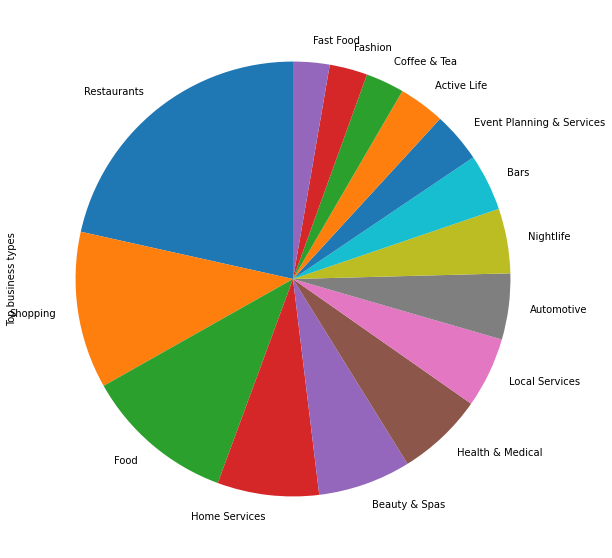

In [247]:
plotTopFreq(business_df,"categories", 15,"Top business types")

As per above plot, Getting reaturants out of business dataframe based on category.

In [248]:
business_df['categories'] = business_df['categories'].astype(str)
restaurant_df = business_df[business_df['categories'].str.contains('Restaurants') == True]
complete_df = restaurant_df.merge(review_df, on = 'business_id').merge(user_df,on = 'user_id')

In [249]:
restaurant_df.head()

business_id                 name  \
8   pQeaRpvuhoEqudo3uymHIQ  The Empanadas House   
20  CsLQLiRoafpJPJSkNX2h5Q     Middle East Deli   
24  eBEfgOPG7pvFhb2wcG9I7w      Philthy Phillys   
25  lu7vtrp_bE9PnxWfA8g4Pg         Banzai Sushi   
30  9sRGfSVEfLhN_km60YruTA   Apadana Restaurant   

                             address           city state postal_code  \
8                     404 E Green St      Champaign    IL       61820   
20          4508 E Independence Blvd      Charlotte    NC       28205   
24  15480 Bayview Avenue, unit D0110         Aurora    ON     L4G 7J1   
25                   300 John Street      Thornhill    ON     L3T 5W4   
30                13071 Yonge Street  Richmond Hill    ON     L4E 1A5   

     latitude  longitude  stars  review_count  is_open  \
8   40.110446 -88.233073    4.5             5        1   
20  35.194894 -80.767442    3.0             5        0   
24  44.010962 -79.448677    4.5             4        1   
25  43.820492 -79.398466    4.5             7        1   
30  43.947011 -79.454862    3.0             3        1   

                                           attributes  \
8   {'RestaurantsAttire': 'u'casual'', 'Restaurant...   
20  {'RestaurantsGoodForGroups': 'True', 'OutdoorS...   
24  {'RestaurantsTableService': 'False', 'Restaura...   
25  {'GoodForKids': 'True', 'RestaurantsTakeOut': ...   
30  {'Ambience': '{'touristy': False, 'hipster': F...   

                                           categories  \
8   Ethnic Food, Food Trucks, Specialty Food, Impo...   
20         Food, Restaurants, Grocery, Middle Eastern   
24             Restaurants, Cheesesteaks, Poutineries   
25       Japanese, Fast Food, Food Court, Restaurants   
30  Persian/Iranian, Turkish, Middle Eastern, Rest...   

                                                hours  
8   {'Monday': '11:30-14:30', 'Tuesday': '11:30-14...  
20                                               None  
24  {'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...  
25                                               None  
30  {'Tuesday': '12:0-21:0', 'Wednesday': '12:0-21...

In [250]:
complete_df.shape

(39807, 43)

In [251]:
#Check null valus in dataframes
business_df.isnull().sum()
review_df.isnull().sum()
user_df.isnull().sum()
checkin_df.isnull().sum()
tip_df.isnull().sum()
restaurant_df.isnull().sum()
complete_df.isnull().sum()

business_id              0
name_x                   0
address                  0
city                     0
state                    0
postal_code              0
latitude                 0
longitude                0
stars_x                  0
review_count_x           0
is_open                  0
attributes              65
categories               0
hours                 2215
review_id                0
user_id                  0
stars_y                  0
useful_x                 0
funny_x                  0
cool_x                   0
text                     0
date                     0
name_y                   0
review_count_y           0
yelping_since            0
useful_y                 0
funny_y                  0
cool_y                   0
elite                    0
friends                  0
fans                     0
average_stars            0
compliment_hot           0
compliment_more          0
compliment_profile       0
compliment_cute          0
compliment_list          0
c

# **Exploratory Data Analysis**

C:\Users\Ruchi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


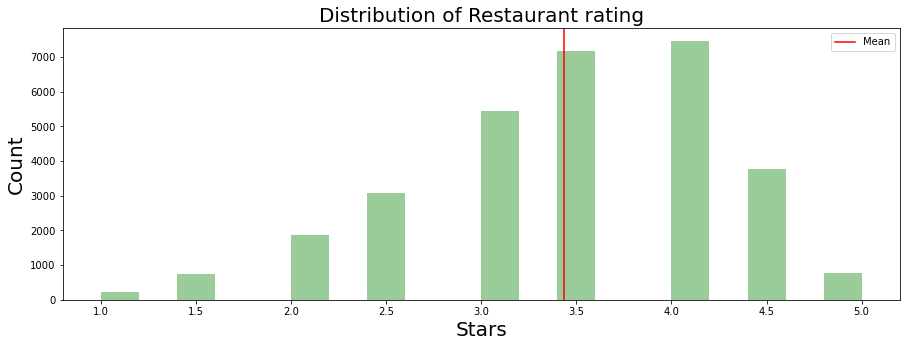

In [252]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))
sns.distplot(restaurant_df.stars,kde=False,color = 'g',ax =ax,bins=20);
ax.axvline(restaurant_df.stars.mean(), 0, 1, color='r', label='Mean')
ax.legend();
ax.set_ylabel('Count',size=20)
ax.set_xlabel('Stars',size=20)
ax.set_title('Distribution of Restaurant rating',size=20);

As we notice above more restaurants get 3 - 4 ratings than other ratings

C:\Users\Ruchi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of different Reviews rating')

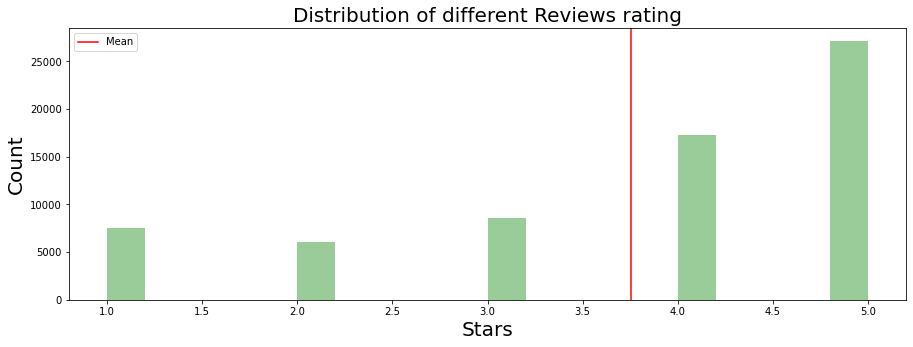

In [238]:
#review just for business which are restautrant
review_df_filter_df = review_df.merge(restaurant_df,how='inner',on='business_id')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))
sns.distplot(review_df_filter_df.stars_x,kde=False,color = 'g',ax =ax,bins=20);
ax.axvline(review_df_filter_df.stars_x.mean(), 0, 1, color='r', label='Mean')
ax.legend();
ax.set_ylabel('Count',size=20)
ax.set_xlabel('Stars',size=20)
ax.set_title('Distribution of different Reviews rating',size=20)

As we see above, more restaurent have 4 star rating, Average rating is 3.7

Text(0.5, 1.0, 'Distribution of User given rating')

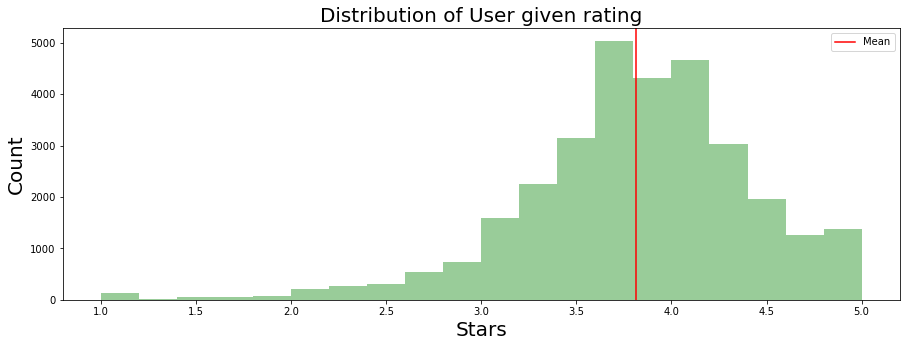

In [202]:
#user just for business which are restautrant
user_df_filter_df = complete_df.groupby(['user_id'],as_index=False).mean()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))
sns.distplot(user_df_filter_df.average_stars,kde=False,color = 'g',ax =ax,bins=20);
ax.axvline(user_df_filter_df.average_stars.mean(), 0, 1, color='r', label='Mean')
ax.legend();
ax.set_ylabel('Count',size=20)
ax.set_xlabel('Stars',size=20)
ax.set_title('Distribution of User given rating',size=20)

As we see above, users give majorly 3.5 - 4.5 stars.

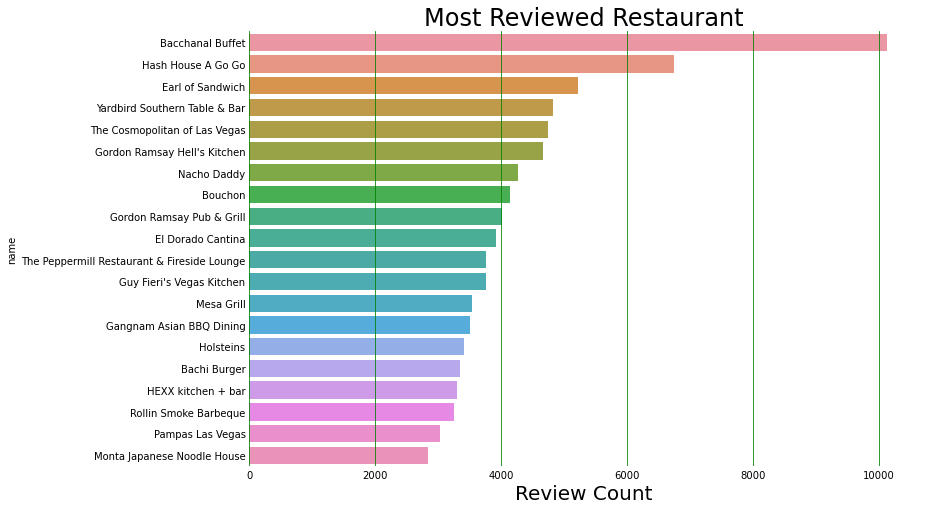

In [203]:
#get top 20 most reviewed restaurants
n_top =20
most_reviewed_restaurant = restaurant_df.nlargest(n_top, 'review_count')
fig, ax = plt.subplots()
ax = sns.barplot(y="name", x="review_count", data=most_reviewed_restaurant)
ax.set_xlabel('Review Count',size=20)
fig.set_size_inches(12, 8)
plt.title("Most Reviewed Restaurant",fontsize=24);
ax.grid(axis = 'x', color ='green', linestyle='-')
ax.tick_params(axis='both', which='both',length=0)
sns.despine(left=True, bottom=True)

Bacchanal Buffet is reviewed more number of times compared to others

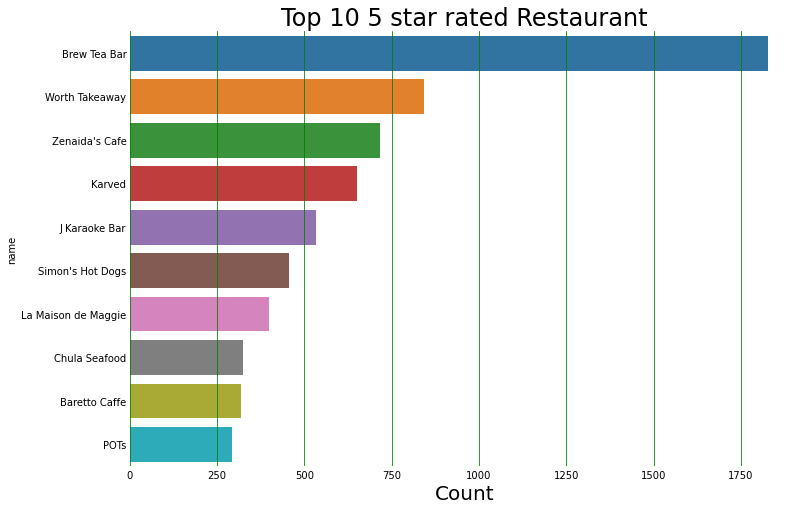

In [204]:
top_rated_restaurant = restaurant_df.sort_values(by=['stars','review_count'], ascending=False)[['name','business_id','review_count','stars']]
#get top 10 5 star rated restaurant
n_top =10
top_rated_restaurant = top_rated_restaurant.nlargest(n_top, 'stars')
fig, ax = plt.subplots()
ax = sns.barplot(y="name", x="review_count", data = top_rated_restaurant)
ax.set_xlabel('Count',size=20)
fig.set_size_inches(12, 8)
plt.title("Top 10 5 star rated Restaurant",fontsize=24);
ax.grid(axis = 'x', color ='green', linestyle='-')
ax.tick_params(axis='both', which='both',length=0)
sns.despine(left=True, bottom=True)

Brew Tea Bar is the top "5 star rated" restaurant

In [209]:
#Defining a function get review count for food categories.
def get_food_type_count(category):
    count = restaurant_df[restaurant_df['categories'].str.contains(category)==True]['business_id'].count()
    return count

In [210]:
#Getting Food Categories in a list
food_dict = {}
food_categories = ['American','Italian','Mexican','Chinese','Thai','Indian','Japan','French']
for food_category in food_categories:
    food_dict[food_category] = get_food_type_count(food_category)

Text(0, 0.5, 'Count')

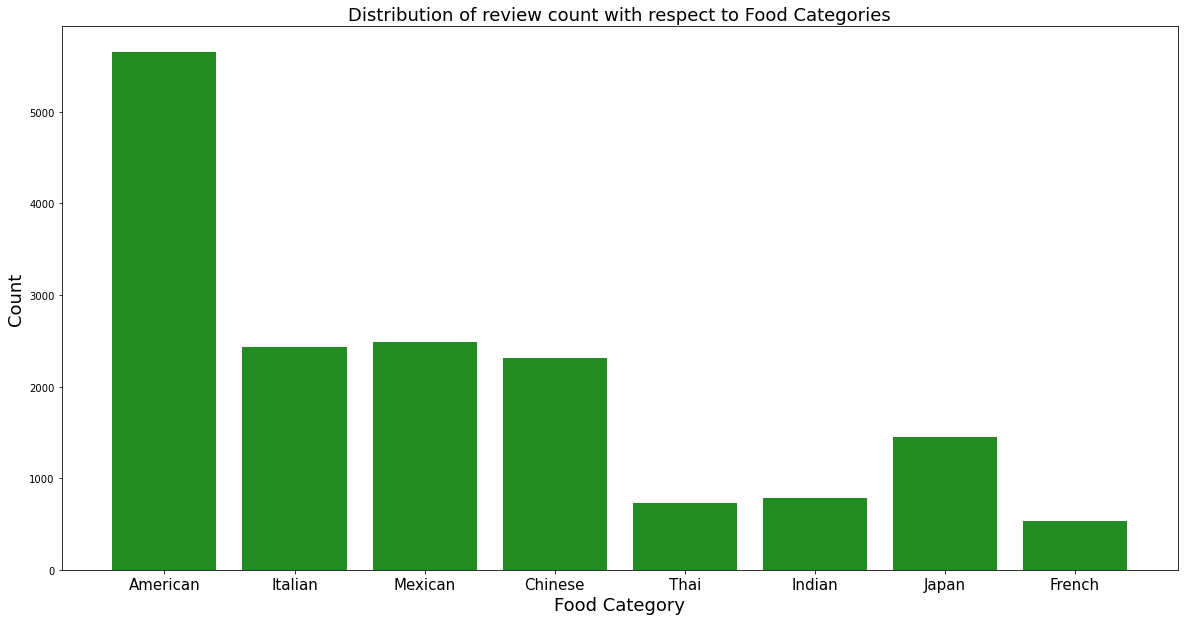

In [211]:
#Plot the distribution of review count among various food categories.
plt.figure(figsize=(20,10))
plt.bar(range(len(food_dict)), food_dict.values(), align='center', color='forestgreen')
plt.xticks(range(len(food_dict)), list(food_dict.keys()), fontsize = 15);
plt.title('Distribution of review count with respect to Food Categories', fontsize=18)
plt.xlabel('Food Category', fontsize=18)
plt.ylabel('Count', fontsize=18)

We can see American food category have higher count of reviews followed by Italian, Mexican and Chinese

C:\Users\Ruchi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


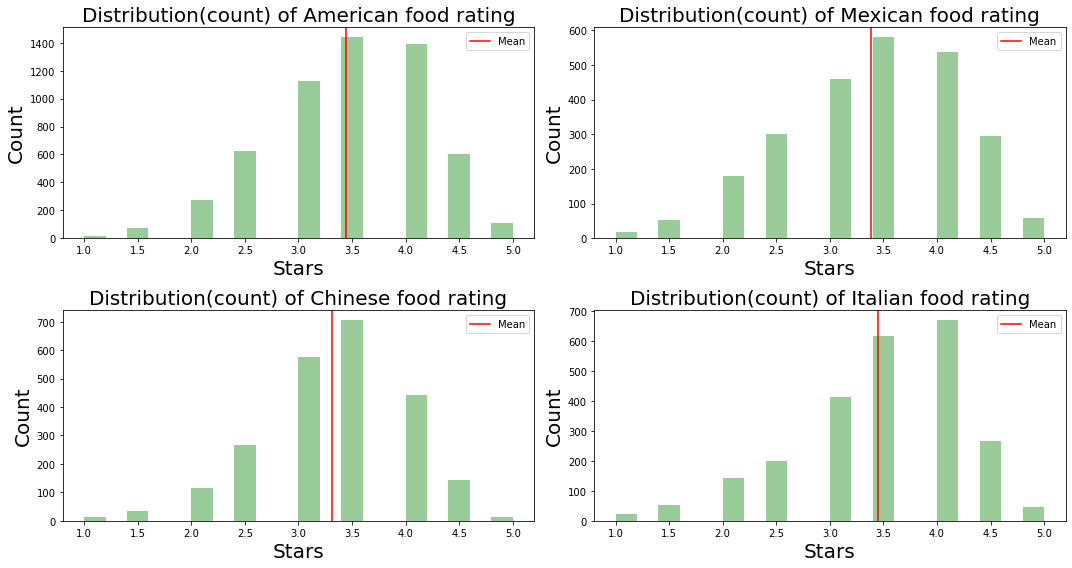

In [216]:
#Get Top four food category restaurent details into separate dataframes and plot the review count among them.
American_restaurant_rating_df = restaurant_df[restaurant_df['categories'].str.contains('American')==True][['business_id','stars','categories','name','review_count']]
Mexican_restaurant_rating_df = restaurant_df[restaurant_df['categories'].str.contains('Mexican')==True][['business_id','stars','categories','name','review_count']]
Chinese_restaurant_rating_df = restaurant_df[restaurant_df['categories'].str.contains('Chinese')==True][['business_id','stars','categories','name','review_count']]
Italian_restaurant_rating_df = restaurant_df[restaurant_df['categories'].str.contains('Italian')==True][['business_id','stars','categories','name','review_count']]

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))
ax = ax.ravel()

def restaurant_category(df, title, ax):
    sns.distplot(df.stars,kde=False,color = 'g',ax =ax,bins=20);
    ax.axvline(df.stars.mean(), 0, 1, color='r', label='Mean')
    ax.legend();
    ax.set_ylabel('Count',size=20)
    ax.set_xlabel('Stars',size=20)
    ax.set_title('Distribution(count) of '+ title + ' food rating',size=20);
restaurant_category(American_restaurant_rating_df, 'American', ax[0])
restaurant_category(Mexican_restaurant_rating_df, 'Mexican', ax[1])
restaurant_category(Chinese_restaurant_rating_df, 'Chinese', ax[2])
restaurant_category(Italian_restaurant_rating_df, 'Italian', ax[3])
plt.tight_layout()

Average rating of all types of food is similar.

In [217]:
American_restaurant_rating_df.head(2)

business_id  stars  \
42  fhNf_sg-XzZ3e7HEVGuOZg    3.0   
46  xFc50drSPxXkcLvX5ygqrg    3.5   

                                           categories  \
42  Burgers, Restaurants, American (Traditional), ...   
46  Burgers, Fast Food, American (New), Restaurant...   

                           name  review_count  
42        Meat Chix And Wieners            10  
46  Boomer's Sweet Home Chicago            12

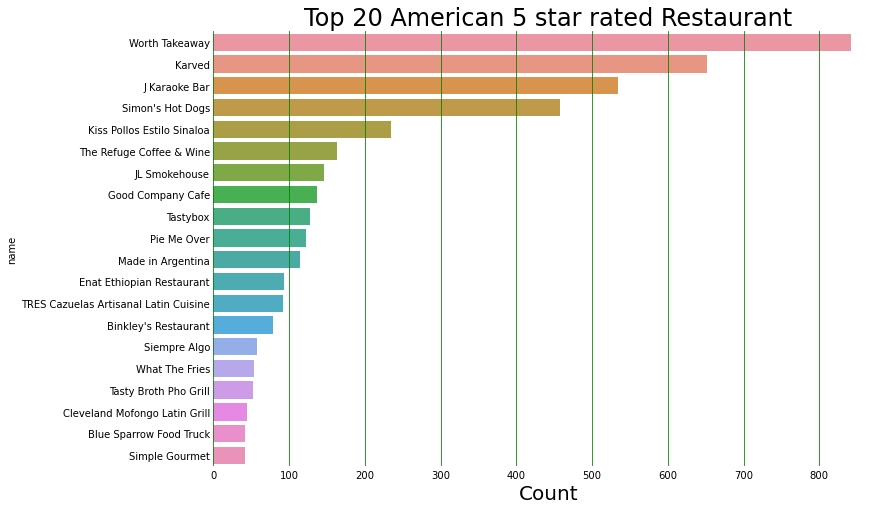

In [218]:
#get top 20 5 star rated restaurant
American_top_rated_restaurant = American_restaurant_rating_df.sort_values(by=['stars','review_count'], ascending=False)[['name','business_id','review_count','stars']]
n_top =20
American_top_rated_restaurant = American_top_rated_restaurant.nlargest(n_top, 'stars')
fig, ax = plt.subplots()
ax = sns.barplot(y="name", x="review_count", data=American_top_rated_restaurant)
ax.set_xlabel('Count',size=20)
fig.set_size_inches(12, 8)
plt.title("Top 20 American 5 star rated Restaurant",fontsize=24);
ax.grid(axis = 'x', color ='green', linestyle='-')
ax.tick_params(axis='both', which='both',length=0)
sns.despine(left=True, bottom=True)

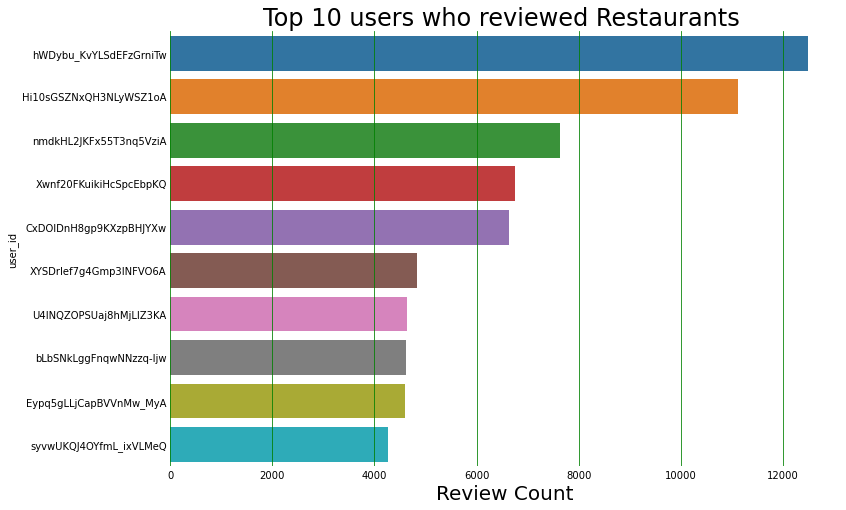

In [219]:
n_top =10
most_review_user = user_df_filter_df.nlargest(n_top, 'review_count_y').reindex()
fig, ax = plt.subplots()
ax = sns.barplot(y="user_id", x="review_count_y", data=most_review_user)
ax.set_xlabel('Review Count',size=20)
fig.set_size_inches(12, 8)
plt.title("Top 10 users who reviewed Restaurants ",fontsize=24);
ax.grid(axis = 'x', color ='green', linestyle='-')
ax.tick_params(axis='both', which='both',length=0)
sns.despine(left=True, bottom=True)

No handles with labels found to put in legend.
No handles with labels found to put in legend.


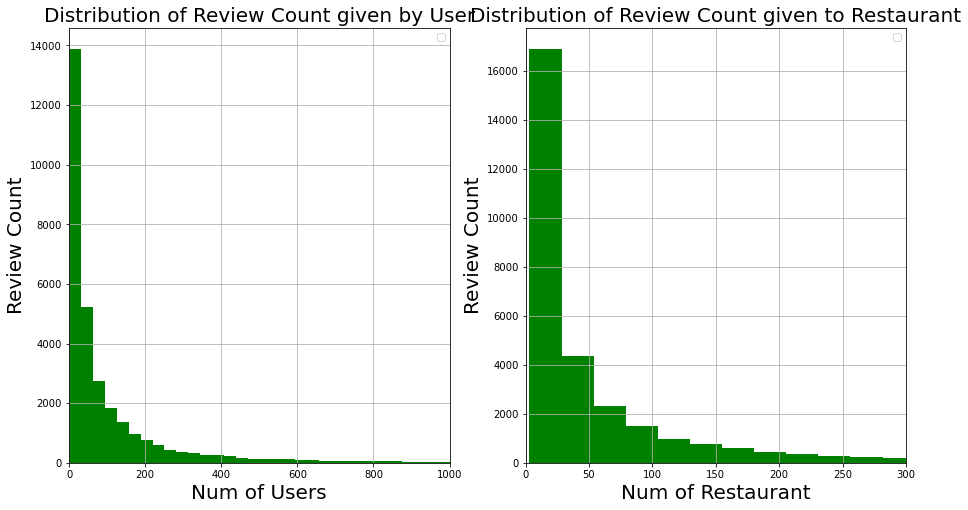

In [220]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))
user_df_filter_df.review_count_y.hist(bins=400,ax=ax[0],color = 'g')
#plt.xlim([0,1000])
ax[0].legend();
ax[0].set_xlim([0,1000])
ax[0].set_ylabel('Review Count',size=20)
ax[0].set_xlabel('Num of Users',size=20)
ax[0].set_title('Distribution of Review Count given by User',size=20);

restaurant_df.review_count.hist(bins=400,ax=ax[1],color = 'g')
ax[1].set_xlim([0,300])
ax[1].legend();
ax[1].set_ylabel('Review Count',size=20)
ax[1].set_xlabel('Num of Restaurant',size=20)
ax[1].set_title('Distribution of Review Count given to Restaurant',size=20);

**Different Type of Businesses and their Count**

<AxesSubplot:>

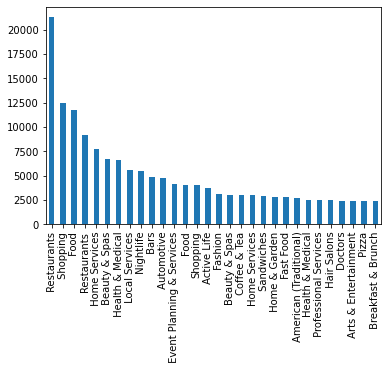

In [221]:
uniq_cat_dict = {}
for i in business_df.categories:
    cat = str(i).split(',')
    for j in cat:
        if j not in uniq_cat_dict.keys():
            uniq_cat_dict[j] = 1
        else:
            uniq_cat_dict[j] += 1
uniq_cat_series = pd.Series(uniq_cat_dict)
uniq_cat_series.sort_values(ascending = False, inplace = True)
uniq_cat_series[:30].plot(kind = 'bar')

**Business and City Ordered pairs and their count**

<AxesSubplot:>

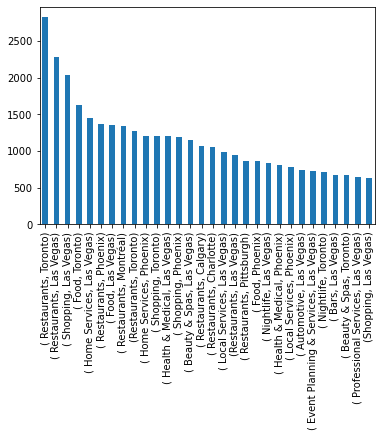

In [222]:
business_city = {}
n = len(business_df)
for i in range(n):
    k1 = str(business_df.categories.iloc[i]).split(',')
    k2 = business_df.city.iloc[i]
    for j in k1:
        k = (j,k2)
        if k not in business_city.keys():
            business_city[k] = 1
        else:
            business_city[k] += 1
business_city_series = pd.Series(business_city)
business_city_series.sort_values(ascending = False, inplace = True)
business_city_series[:30].plot(kind = 'bar')

From above two graphs, It can be seen that most of the businesses listed on the Yelp are Restaurants, Shopping places and Recreational Centers. For this given data set (obtained from Yelp's Website), top cities with maximum businesses are Toronto, Las Vegas, Phoenix.

In [223]:
# Function that extract keys from the nested dictionary
def extract_keys(attr, key):
    if attr == None:
        return "{}"
    if key in attr:
        return attr.pop(key)

# convert string to dictionary
import ast
def str_to_dict(attr):
    if attr != None:
        return ast.literal_eval(attr)
    else:
        return ast.literal_eval("{}") 

In [224]:
# get dummies from nested attributes
complete_df['BusinessParking'] = complete_df.apply(lambda x: str_to_dict(extract_keys(x['attributes'], 'BusinessParking')), axis=1)
complete_df['Ambience'] = complete_df.apply(lambda x: str_to_dict(extract_keys(x['attributes'], 'Ambience')), axis=1)
complete_df['GoodForMeal'] = complete_df.apply(lambda x: str_to_dict(extract_keys(x['attributes'], 'GoodForMeal')), axis=1)
complete_df['Dietary'] = complete_df.apply(lambda x: str_to_dict(extract_keys(x['attributes'], 'Dietary')), axis=1)
complete_df['Music'] = complete_df.apply(lambda x: str_to_dict(extract_keys(x['attributes'], 'Music')), axis=1)

In [236]:
complete_df.head()

business_id                  name_x                   address  \
0  CsLQLiRoafpJPJSkNX2h5Q        Middle East Deli  4508 E Independence Blvd   
1  D-RQsQjEVI_w-KC7iDJd5Q          Cuisine Malaya        1411 Elizabeth Ave   
2  osSwv6CJy5hDKQdOKeyTow                Ru San's              2440 Park Rd   
3  WksJ0azJ63ijYh0p2HFZHA  Casa Grande Restaurant           3609 South Blvd   
4  mbfu9ag4VQYIi6dvhCX2dQ       Taqueria La Unica          2801 Central Ave   

        city state postal_code   latitude  longitude  stars_x  review_count_x  \
0  Charlotte    NC       28205  35.194894 -80.767442      3.0               5   
1  Charlotte    NC       28204  35.215478 -80.828521      4.0             160   
2  Charlotte    NC       28203  35.197738 -80.852719      4.0             631   
3  Charlotte    NC       28209  35.192733 -80.873569      4.0              12   
4  Charlotte    NC       28205  35.219082 -80.796639      3.0               9   

   ...  compliment_plain compliment_cool compliment_funny compliment_writer  \
0  ...               296             189              189                60   
1  ...               296             189              189                60   
2  ...               296             189              189                60   
3  ...               296             189              189                60   
4  ...               296             189              189                60   

  compliment_photos                                    BusinessParking  \
0                35  {'garage': False, 'street': False, 'validated'...   
1                35  {'garage': False, 'street': False, 'validated'...   
2                35  {'garage': False, 'street': False, 'validated'...   
3                35  {'garage': False, 'street': False, 'validated'...   
4                35  {'garage': False, 'street': False, 'validated'...   

                                            Ambience  \
0                                                 {}   
1  {'romantic': False, 'intimate': False, 'touris...   
2  {'touristy': False, 'hipster': None, 'romantic...   
3  {'romantic': False, 'intimate': False, 'touris...   
4  {'romantic': False, 'intimate': False, 'classy...   

                                         GoodForMeal  Dietary  Music  
0                                                 {}       {}     {}  
1                                                 {}       {}     {}  
2  {'dessert': False, 'latenight': False, 'lunch'...       {}     {}  
3                                                 {}       {}     {}  
4                                                 {}       {}     {}  

[5 rows x 48 columns]

In [226]:
# create table with attribute dummies
df_attr = pd.concat([ complete_df['attributes'].apply(pd.Series), complete_df['BusinessParking'].apply(pd.Series),
                    complete_df['Ambience'].apply(pd.Series), complete_df['GoodForMeal'].apply(pd.Series), 
                    complete_df['Dietary'].apply(pd.Series) ], axis=1)
df_attr_dummies = pd.get_dummies(df_attr)
df_attr_dummies

RestaurantsGoodForGroups_False  RestaurantsGoodForGroups_None  \
0                                   0                              0   
1                                   0                              0   
2                                   0                              0   
3                                   0                              0   
4                                   0                              0   
...                               ...                            ...   
39802                               1                              0   
39803                               1                              0   
39804                               1                              0   
39805                               1                              0   
39806                               1                              0   

       RestaurantsGoodForGroups_True  OutdoorSeating_False  \
0                                  1                     1   
1                                  1                     1   
2                                  1                     0   
3                                  1                     1   
4                                  1                     0   
...                              ...                   ...   
39802                              0                     1   
39803                              0                     1   
39804                              0                     1   
39805                              0                     1   
39806                              0                     1   

       OutdoorSeating_None  OutdoorSeating_True  \
0                        0                    0   
1                        0                    0   
2                        0                    1   
3                        0                    0   
4                        0                    1   
...                    ...                  ...   
39802                    0                    0   
39803                    0                    0   
39804                    0                    0   
39805                    0                    0   
39806                    0                    0   

       BusinessAcceptsCreditCards_False  BusinessAcceptsCreditCards_None  \
0                                     0                                0   
1                                     0                                0   
2                                     0                                0   
3                                     0                                0   
4                                     0                                0   
...                                 ...                              ...   
39802                                 1                                0   
39803                                 1                                0   
39804                                 1                                0   
39805                                 1                                0   
39806                                 1                                0   

       BusinessAcceptsCreditCards_True  RestaurantsTakeOut_False  ...  \
0                                    1                         0  ...   
1                                    1                         0  ...   
2                                    1                         0  ...   
3                                    1                         0  ...   
4                                    1                         0  ...   
...                                ...                       ...  ...   
39802                                0                         0  ...   
39803                                0                         0  ...   
39804                                0                         0  ...   
39805                                0                         0  ...   
39806                                0                         0  ..

In [227]:
# get dummies from categories
df_categories_dummies = pd.Series(complete_df['categories']).str.get_dummies(',')
df_categories_dummies

Acai Bowls   Accessories   Active Life   Adult Education  \
0                0             0             0                 0   
1                0             0             0                 0   
2                0             0             0                 0   
3                0             0             0                 0   
4                0             0             0                 0   
...            ...           ...           ...               ...   
39802            0             0             0                 0   
39803            0             0             0                 0   
39804            0             0             0                 0   
39805            0             0             0                 0   
39806            0             0             0                 0   

        Adult Entertainment   Afghan   African   Airports  \
0                         0        0         0          0   
1                         0        0         0          0   
2                         0        0         0          0   
3                         0        0         0          0   
4                         0        0         0          0   
...                     ...      ...       ...        ...   
39802                     0        0         0          0   
39803                     0        0         0          0   
39804                     0        0         0          0   
39805                     0        0         0          0   
39806                     0        0         0          0   

        Amateur Sports Teams   American (New)  ...  Turkish  Vegan  \
0                          0                0  ...        0      0   
1                          0                0  ...        0      0   
2                          0                0  ...        0      0   
3                          0                0  ...        0      0   
4                          0                0  ...        0      0   
...                      ...              ...  ...      ...    ...   
39802                      0                0  ...        0      0   
39803                      0                0  ...        0      0   
39804                      0                0  ...        0      0   
39805                      0                0  ...        0      0   
39806                      0                0  ...        0      0   

       Vegetarian  Venues & Event Spaces  Vietnamese  Waffles  \
0               0                      0           0        0   
1               0                      0           0        0   
2               0                      0           0        0   
3               0                      0           0        0   
4               0                      0           0        0   
...           ...                    ...         ...      ...   
39802           0                      0           0        0   
39803           0                      0           0        0   
39804           0                      0           0        0   
39805           0                      0           0        0   
39806           0                      0           0        0   

       Wedding Planning  Wine Bars  Wraps  Yoga  
0                     0          0      0     0  
1                     0          0      0     0  
2                     0          0      0     0  
3                     0          0      0     0  
4                     0          0      0     0  
...                 ...        ...    ...   ...  
39802                 0          0      0     0  
39803                 0          0      0     0  
39804                 0          0      0     0  
39805                 0          0      0     0  
39806                 0          0      0     0  

[39807 rows x 553 columns]

In [253]:
# pull out names and stars from rest table 
result = complete_df[['name_x','stars_x']]
result

name_x  stars_x
0            Middle East Deli      3.0
1              Cuisine Malaya      4.0
2                    Ru San's      4.0
3      Casa Grande Restaurant      4.0
4           Taqueria La Unica      3.0
...                       ...      ...
39802           Steve's Gyros      4.5
39803           Steve's Gyros      4.5
39804           Steve's Gyros      4.5
39805           Steve's Gyros      4.5
39806           Steve's Gyros      4.5

[39807 rows x 2 columns]

In [254]:
# Concat all tables and drop Restaurant column
df_final = pd.concat([df_attr_dummies, df_categories_dummies, result], axis=1)
df_final.drop('Restaurants',inplace=True,axis=1)

In [255]:
# map floating point stars to an integer
mapper = {1.0:1,1.5:2, 2.0:2, 2.5:3, 3.0:3, 3.5:4, 4.0:4, 4.5:5, 5.0:5}
df_final['stars_x'] = df_final['stars_x'].map(mapper)

In [256]:
# Final table for the models 
df_final

RestaurantsGoodForGroups_False  RestaurantsGoodForGroups_None  \
0                                   0                              0   
1                                   0                              0   
2                                   0                              0   
3                                   0                              0   
4                                   0                              0   
...                               ...                            ...   
39802                               1                              0   
39803                               1                              0   
39804                               1                              0   
39805                               1                              0   
39806                               1                              0   

       RestaurantsGoodForGroups_True  OutdoorSeating_False  \
0                                  1                     1   
1                                  1                     1   
2                                  1                     0   
3                                  1                     1   
4                                  1                     0   
...                              ...                   ...   
39802                              0                     1   
39803                              0                     1   
39804                              0                     1   
39805                              0                     1   
39806                              0                     1   

       OutdoorSeating_None  OutdoorSeating_True  \
0                        0                    0   
1                        0                    0   
2                        0                    1   
3                        0                    0   
4                        0                    1   
...                    ...                  ...   
39802                    0                    0   
39803                    0                    0   
39804                    0                    0   
39805                    0                    0   
39806                    0                    0   

       BusinessAcceptsCreditCards_False  BusinessAcceptsCreditCards_None  \
0                                     0                                0   
1                                     0                                0   
2                                     0                                0   
3                                     0                                0   
4                                     0                                0   
...                                 ...                              ...   
39802                                 1                                0   
39803                                 1                                0   
39804                                 1                                0   
39805                                 1                                0   
39806                                 1                                0   

       BusinessAcceptsCreditCards_True  RestaurantsTakeOut_False  ...  \
0                                    1                         0  ...   
1                                    1                         0  ...   
2                                    1                         0  ...   
3                                    1                         0  ...   
4                                    1                         0  ...   
...                                ...                       ...  ...   
39802                                0                         0  ...   
39803                                0                         0  ...   
39804                                0                         0  ...   
39805                                0                         0  ...   
39806                                0                         0  ..

# Modeling

**1. K-Nearest Neighbours model (KNN)**

In [257]:
# Create X (all the features - Stars) and y (target - Stars)
X = df_final.drop(['name_x'], axis=1)
Y = df_final['name_x']

In [258]:
X

RestaurantsGoodForGroups_False  RestaurantsGoodForGroups_None  \
0                                   0                              0   
1                                   0                              0   
2                                   0                              0   
3                                   0                              0   
4                                   0                              0   
...                               ...                            ...   
39802                               1                              0   
39803                               1                              0   
39804                               1                              0   
39805                               1                              0   
39806                               1                              0   

       RestaurantsGoodForGroups_True  OutdoorSeating_False  \
0                                  1                     1   
1                                  1                     1   
2                                  1                     0   
3                                  1                     1   
4                                  1                     0   
...                              ...                   ...   
39802                              0                     1   
39803                              0                     1   
39804                              0                     1   
39805                              0                     1   
39806                              0                     1   

       OutdoorSeating_None  OutdoorSeating_True  \
0                        0                    0   
1                        0                    0   
2                        0                    1   
3                        0                    0   
4                        0                    1   
...                    ...                  ...   
39802                    0                    0   
39803                    0                    0   
39804                    0                    0   
39805                    0                    0   
39806                    0                    0   

       BusinessAcceptsCreditCards_False  BusinessAcceptsCreditCards_None  \
0                                     0                                0   
1                                     0                                0   
2                                     0                                0   
3                                     0                                0   
4                                     0                                0   
...                                 ...                              ...   
39802                                 1                                0   
39803                                 1                                0   
39804                                 1                                0   
39805                                 1                                0   
39806                                 1                                0   

       BusinessAcceptsCreditCards_True  RestaurantsTakeOut_False  ...  Vegan  \
0                                    1                         0  ...      0   
1                                    1                         0  ...      0   
2                                    1                         0  ...      0   
3                                    1                         0  ...      0   
4                                    1                         0  ...      0   
...                                ...                       ...  ...    ...   
39802                                0                         0  ...      0   
39803                                0                         0  ...      0   
39804                                0                         0  ...      0   
39805                                0                         0  ...  

In [259]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X, Y, train_size=0.8, random_state=1)

In [261]:
#Print score on training and test set
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train_knn, y_train_knn)
accuracy_train = knn.score(X_train_knn, y_train_knn)
accuracy_test = knn.score(X_test_knn, y_test_knn)
print(f"Score on training set: {accuracy_train}")
print(f"Score on test set: {accuracy_test}")

Score on training set: 0.7729941906107709
Score on test set: 0.7454157246922883


In [41]:
X_train_knn.shape

(12511, 707)

In [42]:
# distances and indeces from test set
distances, indeces =  knn.kneighbors(X_test_knn)

In [43]:
distances

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [4.35889894, 4.35889894, 4.47213595, ..., 4.79583152, 4.79583152,
        4.89897949],
       [1.41421356, 1.73205081, 2.        , ..., 2.64575131, 2.64575131,
        2.64575131],
       ...,
       [0.        , 0.        , 0.        , ..., 3.31662479, 3.31662479,
        3.31662479],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [3.31662479, 3.60555128, 3.60555128, ..., 4.        , 4.        ,
        4.        ]])

In [44]:
indeces

array([[ 2356,  7089,  9120, ...,  3515,  6412,   530],
       [10232,  3918,  1879, ...,  1093,  7939,  6653],
       [ 5830, 10422,  2151, ...,  4333,  9788,  3962],
       ...,
       [ 1192,  3547,  6955, ...,  7609,    51, 10935],
       [ 2641,   945,   604, ...,  3365,   733,  2907],
       [ 2934,  1303,  2508, ...,  2040,   771,   634]], dtype=int64)

In [45]:
y_pred = knn.predict(X_test_knn)

In [46]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test_knn, y_pred))
print(classification_report(y_test_knn, y_pred))

[[2 0 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
                                                precision    recall  f1-score   support

                16th Street Sports Bar & Grill       0.67      1.00      0.80         2
                   24 Carrots Juice Bar & Cafe       0.75      1.00      0.86         3
                                    25 Liberty       0.00      0.00      0.00         2
                                    31 Kitchen       1.00      1.00      1.00         1
                                    32 Degrees       0.00      0.00      0.00         1
                                      3pm Cafe       0.00      0.00      0.00         0
                            4 Sons Food Stores       0.00      0.00      0.00         3
                          5spice Noodle Garden       0.00      0.00      0.00         0
                                    68 Kitchen       0.00      0.00      0.00         0

C:\Users\Ruchi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ruchi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The results above show that our KNN model was not able to classify all the records in the test set with good accuracy, 

# Collaboritive Filtering - Model

In [266]:
# combine df_review and restaurant table
combined_business_data = pd.merge(review_df, restaurant_df, on='business_id')

In [267]:
# the most POPULAR restaurants by stars.
combined_business_data.groupby('business_id')['stars_x'].count().sort_values(ascending=False).head()

business_id
rcaPajgKOJC2vo_l3xa42A    657
XZbuPXdyA0ZtTu3AzqtQhg    586
hihud--QRriCYZw1zZvW4g    404
0FUtlsQrJI7LhqDPxLumEw    373
yNPh5SO-7wr8HPpVCDPbXQ    354
Name: stars_x, dtype: int64

In [270]:
# see the NAME of the most popular restaurant
Filter = combined_business_data['business_id'] == 'rcaPajgKOJC2vo_l3xa42A'
print("Name: ", combined_business_data[Filter]['name'].unique())
print("Address:", combined_business_data[Filter]['address'].unique())

Name:  ['Bouchon']
Address: ['3355 Las Vegas Blvd S, Venezia Tower, 10th floor']


In [271]:
# create the copy of combined_business_data table
combined_business_data_keras = combined_business_data.copy()

In [272]:
from sklearn.preprocessing import LabelEncoder

user_encode = LabelEncoder()

combined_business_data_keras['user'] = user_encode.fit_transform(combined_business_data_keras['user_id'].values)
n_users = combined_business_data_keras['user'].nunique()

item_encode = LabelEncoder()

combined_business_data_keras['business'] = item_encode.fit_transform(combined_business_data_keras['business_id'].values)
n_rests = combined_business_data_keras['business'].nunique()

combined_business_data_keras['stars_x'] = combined_business_data_keras['stars_x'].values#.astype(np.float32)

min_rating = min(combined_business_data_keras['stars_x'])
max_rating = max(combined_business_data_keras['stars_x'])

In [273]:
print(n_users, n_rests, min_rating, max_rating)

55592 4852 1.0 5.0


In [274]:
combined_business_data_keras.head()

review_id                 user_id             business_id  \
0  LG2ZaYiOgpr2DK_90pYjNw  V34qejxNsCbcgD8C0HVk-Q  HQl28KMwrEKHqhFrrDqVNQ   
1  4jMOeTiqNXQ8bpmFdWoFUQ  zFCuveEe6M-ijY1iy23IJg  HQl28KMwrEKHqhFrrDqVNQ   
2  wHrtQRyk0ypungXd6hT8nQ  4V985R3RG-rv0B7WCPQzeQ  HQl28KMwrEKHqhFrrDqVNQ   
3  DTb3X5aVOGQ8HHCSAr87wA  nFGcoL6wuPQzxsNJVSfGrA  HQl28KMwrEKHqhFrrDqVNQ   
4  NPyAutqgU_zIZBSnycJd6w  CJqgUQeWhdgbDyLAFy7xvQ  HQl28KMwrEKHqhFrrDqVNQ   

   stars_x  useful  funny  cool  \
0      5.0       1      0     0   
1      5.0       6      2     5   
2      1.0       1      0     0   
3      4.0       2      0     0   
4      4.0       0      0     0   

                                                text                 date  \
0  I love Deagan's. I do. I really do. The atmosp...  2015-12-05 03:18:11   
1  We walked into Melt. "Did you want to put your...  2011-08-25 04:24:23   
2  I commented on how slow the service was last A...  2015-03-04 20:37:43   
3  We walked in off the streets on a September ni...  2014-09-10 01:38:55   
4  Brunch on Saturday was excellent. The Bloody M...  2018-01-21 18:50:29   

                     name  ...   latitude  longitude stars_y review_count  \
0  Deagan's Kitchen & Bar  ...  41.485192 -81.800145     4.0          417   
1  Deagan's Kitchen & Bar  ...  41.485192 -81.800145     4.0          417   
2  Deagan's Kitchen & Bar  ...  41.485192 -81.800145     4.0          417   
3  Deagan's Kitchen & Bar  ...  41.485192 -81.800145     4.0          417   
4  Deagan's Kitchen & Bar  ...  41.485192 -81.800145     4.0          417   

   is_open                                         attributes  \
0        1  {'BusinessAcceptsCreditCards': 'True', 'Outdoo...   
1        1  {'BusinessAcceptsCreditCards': 'True', 'Outdoo...   
2        1  {'BusinessAcceptsCreditCards': 'True', 'Outdoo...   
3        1  {'BusinessAcceptsCreditCards': 'True', 'Outdoo...   
4        1  {'BusinessAcceptsCreditCards': 'True', 'Outdoo...   

                                          categories  \
0  Restaurants, Gastropubs, Nightlife, American (...   
1  Restaurants, Gastropubs, Nightlife, American (...   
2  Restaurants, Gastropubs, Nightlife, American (...   
3  Restaurants, Gastropubs, Nightlife, American (...   
4  Restaurants, Gastropubs, Nightlife, American (...   

                                               hours   user business  
0  {'Tuesday': '11:0-22:0', 'Wednesday': '11:0-22...  27887     1396  
1  {'Tuesday': '11:0-22:0', 'Wednesday': '11:0-22...  54937     1396  
2  {'Tuesday': '11:0-22:0', 'Wednesday': '11:0-22...   4842     1396  
3  {'Tuesday': '11:0-22:0', 'Wednesday': '11:0-22...  44607     1396  
4  {'Tuesday': '11:0-22:0', 'Wednesday': '11:0-22...  11480     1396  

[5 rows x 24 columns]

In [275]:
from sklearn.model_selection import train_test_split
X = combined_business_data_keras[['user', 'business']].values
y = combined_business_data_keras['stars_x'].values
X_train_keras, X_test_keras, y_train_keras, y_test_keras = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_keras.shape, X_test_keras.shape, y_train_keras.shape, y_test_keras.shape

((53356, 2), (13340, 2), (53356,), (13340,))

In [336]:
n_factors = 50
X_train_array = [X_train_keras[:, 0], X_train_keras[:, 1]]
X_test_array = [X_test_keras[:, 0], X_test_keras[:, 1]]

In [337]:
#pip install keras

In [338]:
#pip install tensorflow --user

In [339]:
from keras.layers import Add, Activation, Lambda
from keras.models import Model
from keras.layers import Input, Reshape, Dot
from keras.layers.embeddings import Embedding
from keras.optimizers import Adam
from keras.regularizers import l2

class EmbeddingLayer:
    def __init__(self, n_items, n_factors):
        self.n_items = n_items
        self.n_factors = n_factors
    
    def __call__(self, x):
        x = Embedding(self.n_items, self.n_factors, embeddings_initializer='he_normal', embeddings_regularizer=l2(1e-6))(x)
        x = Reshape((self.n_factors,))(x)
        
        return x
    
def Recommender(n_users, n_rests, n_factors, min_rating, max_rating):
    user = Input(shape=(1,))
    u = EmbeddingLayer(n_users, n_factors)(user)
    ub = EmbeddingLayer(n_users, 1)(user)
    
    restaurant = Input(shape=(1,))
    m = EmbeddingLayer(n_rests, n_factors)(restaurant)
    mb = EmbeddingLayer(n_rests, 1)(restaurant)   
    
    x = Dot(axes=1)([u, m])
    x = Add()([x, ub, mb])
    x = Activation('sigmoid')(x)
    x = Lambda(lambda x: x * (max_rating - min_rating) + min_rating)(x)  
    
    model = Model(inputs=[user, restaurant], outputs=x)
    opt = Adam(lr=0.001)
    model.compile(loss='mean_squared_error', optimizer=opt)  
    
    return model

In [340]:
keras_model = Recommender(n_users, n_rests, n_factors, min_rating, max_rating)
keras_model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_10 (InputLayer)           [(None, 1)]          0                                            
__________________________________________________________________________________________________
embedding_16 (Embedding)        (None, 1, 50)        2779600     input_9[0][0]                    
__________________________________________________________________________________________________
embedding_18 (Embedding)        (None, 1, 50)        242600      input_10[0][0]                   
____________________________________________________________________________________________

In [341]:
history = keras_model.fit(x=X_train_array, y=y_train_keras, batch_size=128, epochs=5, verbose=1, validation_data=(X_test_array, y_test_keras))

Epoch 1/5
417/417 [==============================] - 19s 42ms/step - loss: 2.4092 - val_loss: 2.2661
Epoch 2/5
417/417 [==============================] - 17s 41ms/step - loss: 2.1386 - val_loss: 2.1548
Epoch 3/5
417/417 [==============================] - 17s 41ms/step - loss: 1.4821 - val_loss: 2.0914
Epoch 4/5
417/417 [==============================] - 17s 41ms/step - loss: 0.8072 - val_loss: 2.0731
Epoch 5/5
417/417 [==============================] - 17s 41ms/step - loss: 0.4382 - val_loss: 2.0617


In [342]:
print('Train Loss of the model is ', history.history['loss'][-1])
print('Validation Loss of the model is ', history.history['val_loss'][-1])

Train Loss of the model is  0.42014846205711365
Validation Loss of the model is  2.061743974685669


In [343]:
predictions = keras_model.predict(X_test_array)

In [344]:
# create the df_test table with prediction results
df_test = pd.DataFrame(X_test_keras[:,0])
df_test.rename(columns={0: "user"}, inplace=True)
df_test['business'] = X_test_keras[:,1]
df_test['stars'] = y_test_keras
df_test["predictions"] = predictions
df_test.head()

user  business  stars  predictions
0  52205       222    4.0     3.259470
1  11618      1594    3.0     3.173344
2  52529      4087    4.0     3.190103
3  45445      2428    4.0     3.335440
4  44334      2715    4.0     3.213723

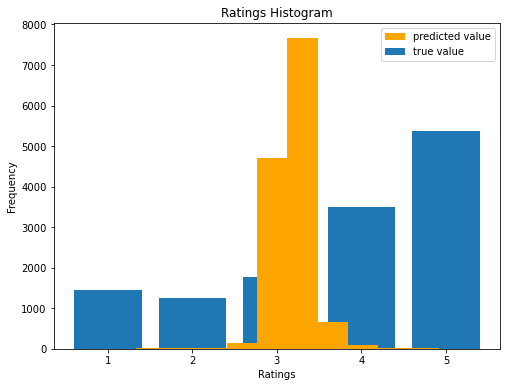

In [345]:
# Plotting the distribution of actual and predicted stars
import matplotlib.pyplot as plt
import seaborn as sns
values, counts = np.unique(df_test['stars'], return_counts=True)
plt.figure(figsize=(8,6))
plt.bar(values, counts, tick_label=['1','2','3','4','5'], label='true value')
plt.hist(predictions, color='orange', label='predicted value')
plt.xlabel("Ratings")
plt.ylabel("Frequency")
plt.title("Ratings Histogram")
plt.legend()
plt.show()

In [348]:
# Extract embeddings
emb = keras_model.get_layer('embedding_18')
emb_weights = emb.get_weights()[0]

print("The shape of embedded weights: ", emb_weights.shape)
print("The length of embedded weights: ", len(emb_weights))

The shape of embedded weights:  (4852, 50)
The length of embedded weights:  4852


In [349]:
# normalize and reshape embedded weights
emb_weights = emb_weights / np.linalg.norm(emb_weights, axis = 1).reshape((-1, 1))
len(emb_weights)

4852

In [350]:
# get all unique business_ids (restaurants)
rest_id_emb = combined_business_data_keras["business_id"].unique()
len(rest_id_emb)

4852

In [351]:
rest_pd = pd.DataFrame(emb_weights)
rest_pd["business_id"] = rest_id_emb
rest_pd = rest_pd.set_index("business_id")
rest_pd

0         1         2         3         4   \
business_id                                                                
HQl28KMwrEKHqhFrrDqVNQ -0.155198  0.102027 -0.164671  0.111802  0.166638   
5JxlZaqCnk1MnbgRirs40Q  0.003581 -0.000316  0.000468  0.002719  0.000046   
IS4cv902ykd8wj1TR0N3-A -0.173710  0.188262  0.176371  0.143452 -0.050845   
nlxHRv1zXGT0c0K51q3jDg -0.159185 -0.153444  0.155676 -0.061003 -0.162653   
Pthe4qk5xh4n-ef-9bvMSg -0.147918  0.138191 -0.089618  0.159393 -0.164176   
...                          ...       ...       ...       ...       ...   
6XZATxc2fcBoSjit1pVDwA -0.124989 -0.116667 -0.006935  0.037044  0.182786   
zVpoYRSywKJdDQCFaACy1A  0.171267 -0.187255 -0.160623  0.191817  0.158392   
4PxeFwWzGW5PnUkknwen3g -0.148601  0.138127  0.157305  0.141715 -0.123351   
JVxsZRI5XX9611xg5qzTrg  0.144980  0.079661 -0.154171  0.174666  0.155050   
PHJpAJUUzNOpKgsJgjzuww -0.159560  0.124666  0.155874  0.165198 -0.136795   

                              5         6         7         8         9   ...  \
business_id                                                               ...   
HQl28KMwrEKHqhFrrDqVNQ -0.077756 -0.174254  0.147549  0.173950 -0.128558  ...   
5JxlZaqCnk1MnbgRirs40Q  0.013278 -0.000529  0.020021 -0.002568 -0.001536  ...   
IS4cv902ykd8wj1TR0N3-A  0.015479  0.190753 -0.190898 -0.077078 -0.198262  ...   
nlxHRv1zXGT0c0K51q3jDg -0.149883  0.141491  0.151167 -0.146299 -0.158452  ...   
Pthe4qk5xh4n-ef-9bvMSg  0.161813 -0.161754  0.153037  0.173013 -0.161323  ...   
...                          ...       ...       ...       ...       ...  ...   
6XZATxc2fcBoSjit1pVDwA -0.144056 -0.184841 -0.181125 -0.141340  0.156403  ...   
zVpoYRSywKJdDQCFaACy1A -0.054149 -0.096220 -0.002854 -0.098359 -0.172132  ...   
4PxeFwWzGW5PnUkknwen3g -0.143627  0.150153  0.140642  0.137714 -0.128052  ...   
JVxsZRI5XX9611xg5qzTrg  0.164036 -0.128050  0.149162  0.113742 -0.107538  ...   
PHJpAJUUzNOpKgsJgjzuww  0.155225 -0.127516 -0.151311  0.128835 -0.167716  ...   

                              40        41        42        43        44  \
business_id                                                                
HQl28KMwrEKHqhFrrDqVNQ -0.156209 -0.094127 -0.128307 -0.114797  0.075590   
5JxlZaqCnk1MnbgRirs40Q -0.026056  0.000242 -0.005306 -0.000377  0.004273   
IS4cv902ykd8wj1TR0N3-A -0.175599  0.188581  0.151188  0.092620 -0.109515   
nlxHRv1zXGT0c0K51q3jDg  0.135988  0.132423  0.154210 -0.099979 -0.102992   
Pthe4qk5xh4n-ef-9bvMSg -0.142949  0.138544  0.163673 -0.167975 -0.180949   
...                          ...       ...       ...       ...       ...   
6XZATxc2fcBoSjit1pVDwA  0.093279 -0.042521 -0.057183 -0.103790 -0.170865   
zVpoYRSywKJdDQCFaACy1A -0.153731 -0.133259 -0.106319  0.176957  0.108627   
4PxeFwWzGW5PnUkknwen3g  0.153721  0.129989  0.152733 -0.117044  0.156622   
JVxsZRI5XX9611xg5qzTrg -0.148464 -0.144032  0.157197 -0.136362  0.140928   
PHJpAJUUzNOpKgsJgjzuww -0.156020  0.110720 -0.160583  0.158869 -0.148540   

                              45        46        47        48        49  
business_id                                                               
HQl28KMwrEKHqhFrrDqVNQ  0.182566  0.003824  0.045298  0.127060 -0.154017  
5JxlZaqCnk1MnbgRirs40Q -0.004944 -0.000104  0.071153  0.026385 -0.058923  
IS4cv902ykd8wj1TR0N3-A -0.182536  0.191364 -0.153522 -0.081909  0.161610  
nlxHRv1zXGT0c0K51q3jDg -0.176710 -0.171481  0.002819  0.110355 -0.155783  
Pthe4qk5xh4n-ef-9bvMSg  0.167427  0.177892 -0.140771  0.180232  0.124173  
...                          ...       ...       ...       ...       ...  
6XZATxc2fcBoSjit1pVDwA -0.131002 -0.177524  0.127437 -0.125449 -0.185249  
zVpoYRSywKJdDQCFaACy1A -0.071479  0.140941  0.021109  0.157280 -0.155824  
4PxeFwWzGW5PnUkknwen3g -0.153891  0.117679  0.158215  0.145843 -0.158228  
JVxsZRI5XX9611xg5qzTrg -0.162859 -0.157671 -0.146399 -0.097845  0.182040  
PHJpAJUUzNOpKgsJgjzuww  0.136783 -0.159564 -0.163388  0.167293  0.122707  

[4852 rows x 50 column

In [352]:
# merging rest_pd and temp tables to get the name of the restaurants.
temp = combined_business_data_keras[['business_id', 'name']].drop_duplicates()
df_recommend = pd.merge(rest_pd, temp, on='business_id')
df_recommend

business_id         0         1         2         3  \
0     HQl28KMwrEKHqhFrrDqVNQ -0.155198  0.102027 -0.164671  0.111802   
1     5JxlZaqCnk1MnbgRirs40Q  0.003581 -0.000316  0.000468  0.002719   
2     IS4cv902ykd8wj1TR0N3-A -0.173710  0.188262  0.176371  0.143452   
3     nlxHRv1zXGT0c0K51q3jDg -0.159185 -0.153444  0.155676 -0.061003   
4     Pthe4qk5xh4n-ef-9bvMSg -0.147918  0.138191 -0.089618  0.159393   
...                      ...       ...       ...       ...       ...   
4847  6XZATxc2fcBoSjit1pVDwA -0.124989 -0.116667 -0.006935  0.037044   
4848  zVpoYRSywKJdDQCFaACy1A  0.171267 -0.187255 -0.160623  0.191817   
4849  4PxeFwWzGW5PnUkknwen3g -0.148601  0.138127  0.157305  0.141715   
4850  JVxsZRI5XX9611xg5qzTrg  0.144980  0.079661 -0.154171  0.174666   
4851  PHJpAJUUzNOpKgsJgjzuww -0.159560  0.124666  0.155874  0.165198   

             4         5         6         7         8  ...        41  \
0     0.166638 -0.077756 -0.174254  0.147549  0.173950  ... -0.094127   
1     0.000046  0.013278 -0.000529  0.020021 -0.002568  ...  0.000242   
2    -0.050845  0.015479  0.190753 -0.190898 -0.077078  ...  0.188581   
3    -0.162653 -0.149883  0.141491  0.151167 -0.146299  ...  0.132423   
4    -0.164176  0.161813 -0.161754  0.153037  0.173013  ...  0.138544   
...        ...       ...       ...       ...       ...  ...       ...   
4847  0.182786 -0.144056 -0.184841 -0.181125 -0.141340  ... -0.042521   
4848  0.158392 -0.054149 -0.096220 -0.002854 -0.098359  ... -0.133259   
4849 -0.123351 -0.143627  0.150153  0.140642  0.137714  ...  0.129989   
4850  0.155050  0.164036 -0.128050  0.149162  0.113742  ... -0.144032   
4851 -0.136795  0.155225 -0.127516 -0.151311  0.128835  ...  0.110720   

            42        43        44        45        46        47        48  \
0    -0.128307 -0.114797  0.075590  0.182566  0.003824  0.045298  0.127060   
1    -0.005306 -0.000377  0.004273 -0.004944 -0.000104  0.071153  0.026385   
2     0.151188  0.092620 -0.109515 -0.182536  0.191364 -0.153522 -0.081909   
3     0.154210 -0.099979 -0.102992 -0.176710 -0.171481  0.002819  0.110355   
4     0.163673 -0.167975 -0.180949  0.167427  0.177892 -0.140771  0.180232   
...        ...       ...       ...       ...       ...       ...       ...   
4847 -0.057183 -0.103790 -0.170865 -0.131002 -0.177524  0.127437 -0.125449   
4848 -0.106319  0.176957  0.108627 -0.071479  0.140941  0.021109  0.157280   
4849  0.152733 -0.117044  0.156622 -0.153891  0.117679  0.158215  0.145843   
4850  0.157197 -0.136362  0.140928 -0.162859 -0.157671 -0.146399 -0.097845   
4851 -0.160583  0.158869 -0.148540  0.136783 -0.159564 -0.163388  0.167293   

            49                            name  
0    -0.154017          Deagan's Kitchen & Bar  
1    -0.058923         Cabo Mexican Restaurant  
2     0.161610  Raising Cane's Chicken Fingers  
3    -0.155783                  Firehouse Subs  
4     0.124173                  Chon Thai Food  
...        ...                             ...  
4847 -0.185249           7Grains Bakery & Café  
4848 -0.155824                     Tiger Sushi  
4849 -0.158228                         Wendy's  
4850  0.182040                   Biryani Depot  
4851  0.122707                     Burger King  

[4852 rows x 52 columns]

In [353]:
# exrtract the target restaurant from the df_recommend table
target = df_recommend[df_recommend['name'] == 'Bouchon']

In [354]:
target.values[0]

array(['rcaPajgKOJC2vo_l3xa42A', 0.12040931731462479,
       -0.14078699052333832, -0.13963080942630768, -0.12451746314764023,
       0.13531143963336945, 0.14962509274482727, 0.11044485867023468,
       -0.1428227573633194, 0.146193727850914, -0.09052570909261703,
       -0.17286275327205658, -0.16528832912445068, -0.1420539766550064,
       -0.124285027384758, -0.14164519309997559, -0.16354019939899445,
       -0.11196750402450562, -0.13528579473495483, 0.13094733655452728,
       -0.16134244203567505, -0.1414061337709427, -0.14045532047748566,
       0.13754554092884064, -0.14637887477874756, 0.12258370220661163,
       0.14319796860218048, -0.1318451166152954, 0.15478520095348358,
       0.13019797205924988, 0.137124702334404, 0.15357741713523865,
       -0.13523590564727783, 0.13034187257289886, 0.1353662610054016,
       0.12388379126787186, -0.15896449983119965, 0.1385342925786972,
       -0.14432811737060547, 0.1733420491218567, -0.1321626603603363,
       -0.15202167630195618,

We are creating a function that calculates the cosine similarity between the target and the rest of the other restaurants and returns the table with the result.

In [355]:
def find_similarity_total(rest_name):
    """Recommends restaurant based on the cosine similarity between restaurants"""
    cosine_list_total = []
    result = []
    for i in range(0, df_recommend.shape[0]):
        sample_name = df_recommend[df_recommend["name"] == rest_name].iloc[:,1:51]
        row = df_recommend.iloc[i,1:51]
        cosine_total = np.dot(sample_name, row)        
        recommended_name = df_recommend.iloc[i,51]
        cosine_list_total.append(cosine_total)
        result.append(recommended_name)        
    cosine_df_total = pd.DataFrame({"similar_rest" : result, "cosine" : cosine_list_total})
    return cosine_df_total

In [357]:
# call the function with input of "Wvrst" and store it in result variable.
result = find_similarity_total('Bouchon')

In [358]:
# head of result table
result.head()

similar_rest                   cosine
0          Deagan's Kitchen & Bar    [0.06020996223721553]
1         Cabo Mexican Restaurant   [-0.10876019277991011]
2  Raising Cane's Chicken Fingers  [-0.008795349788033674]
3                  Firehouse Subs     [0.0811333324465012]
4                  Chon Thai Food   [0.054881608680035554]

In [359]:
'''
- function that replace '[]' to empty str 
- convert string to float
'''
def convert(input):
    inti = str(input).replace('[','').replace(']','').split()[0]
    return float(inti)

In [360]:
# create new column called "cos" in result table
result['cos'] = result.apply(lambda x: convert(x['cosine']), axis=1)

# drop original 'cosine' column (which had values with np.array)
result.drop('cosine', axis=1, inplace=True)

In [361]:
print('Following are the Restaurant Recommedations: \n\n', result.sort_values('cos', ascending=False).head(10))

Following are the Restaurant Recommedations: 

                             similar_rest       cos
51                               Bouchon  1.000000
1407              Satisfied Frog On Bell  0.510170
673                Nicholas Coffee & Tea  0.457491
3854                     Peking House 98  0.440637
2098  Moose & Bear, American Grill & Pub  0.438286
4265           Blu Agave Arizona Kitchen  0.418067
4389                         Canbe Foods  0.413046
1651               North Mountain Grille  0.411945
3640                  Birdy's Restaurant  0.405424
4072         Saffron Fine Indian Takeout  0.405199


# Improvements in the model

In [77]:
review_df.head()

review_id                 user_id             business_id  \
0  xQY8N_XvtGbearJ5X4QryQ  OwjRMXRC0KyPrIlcjaXeFQ  -MhfebM0QIsKt87iDN-FNw   
1  UmFMZ8PyXZTY2QcwzsfQYA  nIJD_7ZXHq-FX8byPMOkMQ  lbrU8StCq3yDfr-QMnGrmQ   
2  LG2ZaYiOgpr2DK_90pYjNw  V34qejxNsCbcgD8C0HVk-Q  HQl28KMwrEKHqhFrrDqVNQ   
3  i6g_oA9Yf9Y31qt0wibXpw  ofKDkJKXSKZXu5xJNGiiBQ  5JxlZaqCnk1MnbgRirs40Q   
4  6TdNDKywdbjoTkizeMce8A  UgMW8bLE0QMJDCkQ1Ax5Mg  IS4cv902ykd8wj1TR0N3-A   

   stars  useful  funny  cool  \
0    2.0       5      0     0   
1    1.0       1      1     0   
2    5.0       1      0     0   
3    1.0       0      0     0   
4    4.0       0      0     0   

                                                text                 date  
0  As someone who has worked with many museums, I...  2015-04-15 05:21:16  
1  I am actually horrified this place is still in...  2013-12-07 03:16:52  
2  I love Deagan's. I do. I really do. The atmosp...  2015-12-05 03:18:11  
3  Dismal, lukewarm, defrosted-tasting "TexMex" g...  2011-05-27 05:30:52  
4  Oh happy day, finally have a Canes near my cas...  2017-01-14 21:56:57

In [78]:
review_df.shape

(100000, 9)

**Number of businesses in each city**

<AxesSubplot:xlabel='city'>

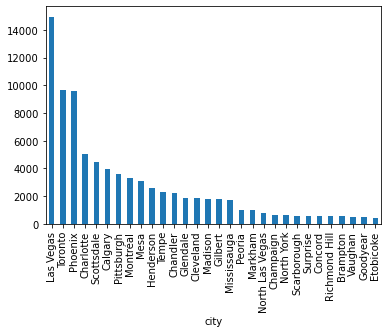

In [79]:
df_bus_groups = business_df.groupby('city').count()
df_bus_city = df_bus_groups['name']
df_bus_city_sorted = df_bus_city.sort_values(ascending = False)
df_bus_city_sorted[:30].plot(kind = 'bar')

**Different Type of Businesses and their Count**

<AxesSubplot:>

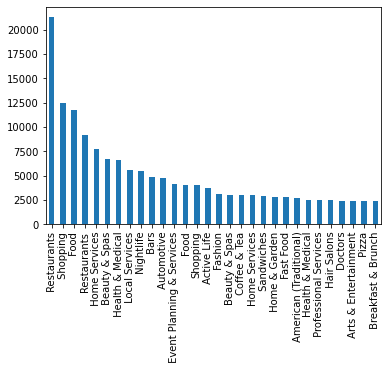

In [80]:
uniq_cat_dict = {}
for i in business_df.categories:
    cat = str(i).split(',')
    for j in cat:
        if j not in uniq_cat_dict.keys():
            uniq_cat_dict[j] = 1
        else:
            uniq_cat_dict[j] += 1
uniq_cat_series = pd.Series(uniq_cat_dict)
uniq_cat_series.sort_values(ascending = False, inplace = True)
uniq_cat_series[:30].plot(kind = 'bar')

**Business and City Ordered pairs and their count**

<AxesSubplot:>

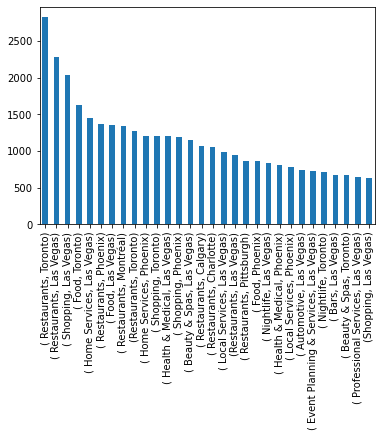

In [81]:
business_city = {}
n = len(business_df)
for i in range(n):
    k1 = str(business_df.categories.iloc[i]).split(',')
    k2 = business_df.city.iloc[i]
    for j in k1:
        k = (j,k2)
        if k not in business_city.keys():
            business_city[k] = 1
        else:
            business_city[k] += 1
business_city_series = pd.Series(business_city)
business_city_series.sort_values(ascending = False, inplace = True)
business_city_series[:30].plot(kind = 'bar')

**It can be seen that most of the businesses listed on the Yelp are Restaurants, Shopping places and Recreational Centers. For this given data set (obtained from Yelp's Website), top cities with maximum businesses are Las Vegas, Phoenix, and Toronto.**

**Cleaning the review data**

Dropping the unwanted columns like 'text': review text, 'useful': Number of people rated it useful, 'date',etc. The columns left are 'user_id', 'business_id' and 'stars'.

In [82]:
df_reduced = review_df.drop(['text','useful','cool', 'date', 'funny'], axis = 1)
df_reduced.head()

review_id                 user_id             business_id  \
0  xQY8N_XvtGbearJ5X4QryQ  OwjRMXRC0KyPrIlcjaXeFQ  -MhfebM0QIsKt87iDN-FNw   
1  UmFMZ8PyXZTY2QcwzsfQYA  nIJD_7ZXHq-FX8byPMOkMQ  lbrU8StCq3yDfr-QMnGrmQ   
2  LG2ZaYiOgpr2DK_90pYjNw  V34qejxNsCbcgD8C0HVk-Q  HQl28KMwrEKHqhFrrDqVNQ   
3  i6g_oA9Yf9Y31qt0wibXpw  ofKDkJKXSKZXu5xJNGiiBQ  5JxlZaqCnk1MnbgRirs40Q   
4  6TdNDKywdbjoTkizeMce8A  UgMW8bLE0QMJDCkQ1Ax5Mg  IS4cv902ykd8wj1TR0N3-A   

   stars  
0    2.0  
1    1.0  
2    5.0  
3    1.0  
4    4.0

In [83]:
df_merged = df_reduced.merge(business_df[['city','categories', 'business_id']], how = 'outer', on= 'business_id')
df_merged.head()

review_id                 user_id             business_id  \
0  xQY8N_XvtGbearJ5X4QryQ  OwjRMXRC0KyPrIlcjaXeFQ  -MhfebM0QIsKt87iDN-FNw   
1  t7xOZF5UKXjSpVcXLOSAgw  owbC7FP8SNAlwv6f9S5Stw  -MhfebM0QIsKt87iDN-FNw   
2  MimB5Xh85rG7phUMPrShag  v9vGnjphb0Hta0lvtf5haA  -MhfebM0QIsKt87iDN-FNw   
3  sLkT7J06L4TK4PiRUFax2g  AXuHgGQoNPkiSXTxHlQc0A  -MhfebM0QIsKt87iDN-FNw   
4  cnV5xtm6WuyaLfot9uWbDg  LkWNo83Lg92C5V4JEyxOZA  -MhfebM0QIsKt87iDN-FNw   

   stars       city                                         categories  
0    2.0  Las Vegas  Shopping, Arts & Entertainment, Art Galleries,...  
1    2.0  Las Vegas  Shopping, Arts & Entertainment, Art Galleries,...  
2    3.0  Las Vegas  Shopping, Arts & Entertainment, Art Galleries,...  
3    2.0  Las Vegas  Shopping, Arts & Entertainment, Art Galleries,...  
4    3.0  Las Vegas  Shopping, Arts & Entertainment, Art Galleries,...

In [84]:
df_cleaned = df_merged.dropna()

In [85]:
def topm_num_reviews_for_city_n_biz(df,m):
    business_city_count = {}
    n = len(df)
    for i in range(n):
        k1 = str(df.categories.iloc[i]).split(',')
        k2 = df.city.iloc[i]
        for j in k1:
            k = (j,k2)
            if k not in business_city_count.keys():
                business_city_count[k] = 1
            else:
                business_city_count[k] += 1
    business_city_count_series = pd.Series(business_city_count)
    business_city_count_series.sort_values(ascending = False, inplace = True)
    return business_city_count_series

<AxesSubplot:>

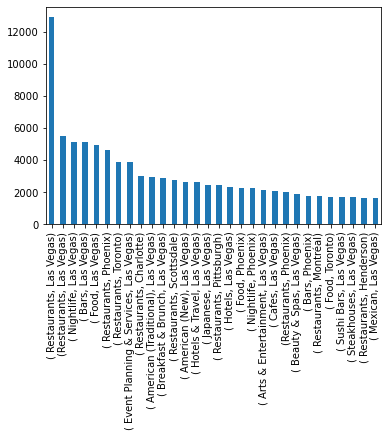

In [86]:
review_business_city = topm_num_reviews_for_city_n_biz(df_cleaned,10)
review_business_city[:30].plot(kind = 'bar')

In [87]:
review_business_city

 Restaurants  Las Vegas             12896
Restaurants   Las Vegas              5506
 Nightlife    Las Vegas              5128
 Bars         Las Vegas              5125
 Food         Las Vegas              4927
                                    ...  
Fashion       Fairlawn                  1
 Pharmacy     Litchfield Park           1
 Shopping     Litchfield Park           1
Drugstores    Litchfield Park           1
 Hot Dogs     Mentor On The Lake        1
Length: 18201, dtype: int64

In [88]:
complete_df

business_id                          name_x  \
0      CsLQLiRoafpJPJSkNX2h5Q                Middle East Deli   
1      CsLQLiRoafpJPJSkNX2h5Q                Middle East Deli   
2      jYqOPpSmtKbKzf0Z_g-Oyg  Flying Biscuit Cafe- Charlotte   
3      lu7vtrp_bE9PnxWfA8g4Pg                    Banzai Sushi   
4      007Dg4ESDVacWcC4Vq704Q             Front Door Organics   
...                       ...                             ...   
15634  H1j34TgbrVZkxeww9xlJTw                   Steve's Gyros   
15635  H1j34TgbrVZkxeww9xlJTw                   Steve's Gyros   
15636  H1j34TgbrVZkxeww9xlJTw                   Steve's Gyros   
15637  H1j34TgbrVZkxeww9xlJTw                   Steve's Gyros   
15638  H1j34TgbrVZkxeww9xlJTw                   Steve's Gyros   

                        address       city state postal_code   latitude  \
0      4508 E Independence Blvd  Charlotte    NC       28205  35.194894   
1      4508 E Independence Blvd  Charlotte    NC       28205  35.194894   
2            7930 Rea Rd, Ste A  Charlotte    NC       28277  35.059093   
3               300 John Street  Thornhill    ON     L3T 5W4  43.820492   
4             415 Horner Avenue    Toronto    ON     M8W 4W3  43.603232   
...                         ...        ...   ...         ...        ...   
15634            1979 W 25th St  Cleveland    OH       44113  41.484686   
15635            1979 W 25th St  Cleveland    OH       44113  41.484686   
15636            1979 W 25th St  Cleveland    OH       44113  41.484686   
15637            1979 W 25th St  Cleveland    OH       44113  41.484686   
15638            1979 W 25th St  Cleveland    OH       44113  41.484686   

       longitude  stars_x  review_count_x  ...  compliment_plain  \
0     -80.767442      3.0               5  ...               296   
1     -80.767442      3.0               5  ...                 8   
2     -80.813859      3.5             283  ...                 8   
3     -79.398466      4.5               7  ...                12   
4     -79.538424      4.0               8  ...                 2   
...          ...      ...             ...  ...               ...   
15634 -81.703062      4.5             160  ...                15   
15635 -81.703062      4.5             160  ...                 2   
15636 -81.703062      4.5             160  ...                 7   
15637 -81.703062      4.5             160  ...                 8   
15638 -81.703062      4.5             160  ...                 8   

      compliment_cool compliment_funny compliment_writer compliment_photos  \
0                 189              189                60                35   
1                   5                5                 2                 0   
2                   5                5                 2                 0   
3                  10               10                14                 4   
4                   1                1                 0                 0   
...               ...              ...               ...               ...   
15634              16               16                11                 1   
15635               2                2                 1                 4   
15636               9                9                 5                 0   
15637              13               13                 8                 0   
15638               9                9                11                 8   

                                         BusinessParking  \
0      {'garage': False, 'street': False, 'validated'...   
1                                                     {}   
2      {'garage': False, 'street': False, 'validated'...   
3                                                     {}   
4                                                     {}   
...                                                  ...   
15634                                                 {}   
15635                                                 {}   
15636                                     

In [89]:
df = complete_df[['review_id', 'user_id', 'business_id', 'text', 'stars_x', 'stars_y', 'date']]

In [90]:
df.isnull().sum()

review_id      0
user_id        0
business_id    0
text           0
stars_x        0
stars_y        0
date           0
dtype: int64

In [91]:
df.head()

review_id                 user_id             business_id  \
0  XyHl5E80hAAlkhOt8m4Aww  whqfWVBj4x5EDboIVDOymQ  CsLQLiRoafpJPJSkNX2h5Q   
1  6lNhsmWPHXcEM1-puvWGuA  TQXtrSpsUyvHMriX8hvNWQ  CsLQLiRoafpJPJSkNX2h5Q   
2  GM3RISwY4WKlky2cY2s1Rg  TQXtrSpsUyvHMriX8hvNWQ  jYqOPpSmtKbKzf0Z_g-Oyg   
3  Q7iupWCt3UpRQSMKp4zO9A  dSTRQSeCqMTbs7l8KF_xJg  lu7vtrp_bE9PnxWfA8g4Pg   
4  ufdLhOT_xDN7Pld35F7QrA  Dl6Y6sjVGL7br1O44rXDQg  007Dg4ESDVacWcC4Vq704Q   

                                                text  stars_x  stars_y  \
0  Definitely under new management, and the dinin...      3.0      3.0   
1  I will also agree that this place has great fo...      3.0      3.0   
2  This new location is just as good as the one i...      3.5      4.0   
3  Been coming here since I was in grade 9 so abo...      4.5      4.0   
4  I love this service, a client had referred me ...      4.0      5.0   

                  date  
0  2010-03-13 13:54:30  
1  2006-11-22 16:22:49  
2  2007-12-30 21:05:51  
3  2015-04-16 05:23:15  
4  2012-09-11 04:15:13

In [92]:
df.shape

(15639, 7)

In [93]:
#Select only stars and text
yelp_data = df[['business_id', 'user_id', 'stars_x', 'stars_y', 'text']]

In [94]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ruchi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [95]:
import string
from nltk.corpus import stopwords
stop = []
for word in stopwords.words('english'):
    s = [char for char in word if char not in string.punctuation]
    stop.append(''.join(s))

In [96]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return " ".join([word for word in nopunc.split() if word.lower() not in stop])

In [97]:
yelp_data['text'] = yelp_data['text'].apply(text_process)

<ipython-input-97-f3a16cc893da>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yelp_data['text'] = yelp_data['text'].apply(text_process)


In [98]:
#Split train test for testing the model later
vld_size=0.15
X_train, X_valid, y_train, y_valid = train_test_split(yelp_data['text'], df['business_id'], test_size = vld_size)

In [99]:
userid_df = yelp_data[['user_id','text']]
business_df = yelp_data[['business_id', 'text']]

In [100]:
userid_df.head()

user_id                                               text
0  whqfWVBj4x5EDboIVDOymQ  Definitely new management dining area totally ...
1  TQXtrSpsUyvHMriX8hvNWQ  also agree place great food However Ive warned...
2  TQXtrSpsUyvHMriX8hvNWQ  new location good one Atlanta thank god eggsep...
3  dSTRQSeCqMTbs7l8KF_xJg  coming since grade 9 10 years wow staff friend...
4  Dl6Y6sjVGL7br1O44rXDQg  love service client referred disappointed yet ...

In [101]:
userid_df[userid_df['user_id']=='whqfWVBj4x5EDboIVDOymQ']['text']

0    Definitely new management dining area totally ...
Name: text, dtype: object

In [102]:
business_df.head()

business_id                                               text
0  CsLQLiRoafpJPJSkNX2h5Q  Definitely new management dining area totally ...
1  CsLQLiRoafpJPJSkNX2h5Q  also agree place great food However Ive warned...
2  jYqOPpSmtKbKzf0Z_g-Oyg  new location good one Atlanta thank god eggsep...
3  lu7vtrp_bE9PnxWfA8g4Pg  coming since grade 9 10 years wow staff friend...
4  007Dg4ESDVacWcC4Vq704Q  love service client referred disappointed yet ...

In [103]:
userid_df = userid_df.groupby('user_id').agg({'text': ' '.join})
business_df = business_df.groupby('business_id').agg({'text': ' '.join})

In [104]:
userid_df.head()

text
user_id                                                                  
--Qh8yKWAvIP4V4K8ZPfHA  torn place one hand department orders departme...
--RlSfc-QmcHFGHyX6aVjA  HATE Nothing DISLIKE Door many signs LIKE Oran...
-00MbjbaOISrcuV7jOVRIg  parents sister went Art Stoll last Thursday en...
-05XqtNjcBq19vh2CVJN8g  Ive many times Ive lost count food ALWAYS cook...
-0IiMAZI2SsQ7VmyzJjokQ  meandering Scottsdale discovering late one nee...

In [105]:
userid_df.loc['whqfWVBj4x5EDboIVDOymQ']['text']

'Definitely new management dining area totally redone Big comfy chairs dangling bistro lighting somewhat comfier menu changed quite bit learns towards Turkish anything else interesting options meaters Veg fare budged neither prices quality portion size improved Falafel comes smidge hummus side nice touch Everyone waited tall female beautiful awesome Mediterranean way theres'

In [106]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import WhitespaceTokenizer, WordPunctTokenizer

In [107]:
#userid vectorizer
userid_vectorizer = TfidfVectorizer(tokenizer = WordPunctTokenizer().tokenize, max_features=5000)
userid_vectors = userid_vectorizer.fit_transform(userid_df['text'])
userid_vectors.shape

(13288, 5000)

In [108]:
userid_vectors

<13288x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 654312 stored elements in Compressed Sparse Row format>

In [109]:
#Business id vectorizer
businessid_vectorizer = TfidfVectorizer(tokenizer = WordPunctTokenizer().tokenize, max_features=5000)
businessid_vectors = businessid_vectorizer.fit_transform(business_df['text'])
businessid_vectors.shape

(2440, 5000)

In [110]:
userid_rating_matrix = pd.pivot_table(yelp_data, values='stars_y', index=['user_id'], columns=['business_id'])
userid_rating_matrix.shape

(13288, 2440)

In [111]:
userid_rating_matrix.head()

business_id             -2uYjztVuVZpkTNAC38zdg  -8F04F54iDT6VgWPCgybug  \
user_id                                                                  
--Qh8yKWAvIP4V4K8ZPfHA                     NaN                     NaN   
--RlSfc-QmcHFGHyX6aVjA                     NaN                     NaN   
-00MbjbaOISrcuV7jOVRIg                     NaN                     NaN   
-05XqtNjcBq19vh2CVJN8g                     NaN                     NaN   
-0IiMAZI2SsQ7VmyzJjokQ                     NaN                     NaN   

business_id             -Bb3kfdHIX1qm2RvtHnOTQ  -CNXJkqeJmLDvmTxGmOVww  \
user_id                                                                  
--Qh8yKWAvIP4V4K8ZPfHA                     NaN                     NaN   
--RlSfc-QmcHFGHyX6aVjA                     NaN                     NaN   
-00MbjbaOISrcuV7jOVRIg                     NaN                     NaN   
-05XqtNjcBq19vh2CVJN8g                     NaN                     NaN   
-0IiMAZI2SsQ7VmyzJjokQ                     NaN                     NaN   

business_id             -FNquqGseSCVMWo7KbK-Tg  -GCX3Cri75gGu6vIoNKVgQ  \
user_id                                                                  
--Qh8yKWAvIP4V4K8ZPfHA                     NaN                     NaN   
--RlSfc-QmcHFGHyX6aVjA                     NaN                     NaN   
-00MbjbaOISrcuV7jOVRIg                     NaN                     NaN   
-05XqtNjcBq19vh2CVJN8g                     NaN                     NaN   
-0IiMAZI2SsQ7VmyzJjokQ                     NaN                     NaN   

business_id             -Glmj_sxqCu0F3G62kFt1Q  -Iu6EwsbZQZY8HTBN853Iw  \
user_id                                                                  
--Qh8yKWAvIP4V4K8ZPfHA                     NaN                     NaN   
--RlSfc-QmcHFGHyX6aVjA                     NaN                     NaN   
-00MbjbaOISrcuV7jOVRIg                     NaN                     NaN   
-05XqtNjcBq19vh2CVJN8g                     NaN                     NaN   
-0IiMAZI2SsQ7VmyzJjokQ                     NaN                     NaN   

business_id             -Jhlh8Scjy669NdtCfKSSg  -KqJjXDhqq6Ah5cMiF-sug  ...  \
user_id                                                                 ...   
--Qh8yKWAvIP4V4K8ZPfHA                     NaN                     NaN  ...   
--RlSfc-QmcHFGHyX6aVjA                     NaN                     NaN  ...   
-00MbjbaOISrcuV7jOVRIg                     NaN                     NaN  ...   
-05XqtNjcBq19vh2CVJN8g                     NaN                     NaN  ...   
-0IiMAZI2SsQ7VmyzJjokQ                     NaN                     NaN  ...   

business_id             zpGCFAt_MydbQN4EsXee6w  zrnP9HqoF-RI9jqoW8pytA  \
user_id                                                                  
--Qh8yKWAvIP4V4K8ZPfHA                     NaN                     NaN   
--RlSfc-QmcHFGHyX6aVjA                     NaN                     NaN   
-00MbjbaOISrcuV7jOVRIg                     NaN                     NaN   
-05XqtNjcBq19vh2CVJN8g                     NaN                     NaN   
-0IiMAZI2SsQ7VmyzJjokQ                     NaN                     NaN   

business_id             zs3V4WqtYVMhIoycEeirRA  zttcrQP4MxNS5X5itzStXg  \
user_id                                                                  
--Qh8yKWAvIP4V4K8ZPfHA                     NaN                     NaN   
--RlSfc-QmcHFGHyX6aVjA                     NaN                     NaN   
-00MbjbaOISrcuV7jOVRIg                     NaN                     NaN   
-05XqtNjcBq19vh2CVJN8g                     NaN                     NaN   
-0IiMAZI2SsQ7VmyzJjokQ                     NaN                     NaN   

business_id             zu5dqKqPjJCycS5k-92Alg  zuVvDYJkKAbXQTTBauAqJQ  \
user_id                                                                  
--Qh8yKWAvIP4V4K8ZPfHA                     NaN                     NaN   
--RlSfc-QmcHFGHyX6aVjA                     NaN                     NaN   
-00MbjbaOISrcuV7jOVRIg              

In [112]:
P = pd.DataFrame(userid_vectors.toarray(), index=userid_df.index, columns=userid_vectorizer.get_feature_names())
Q = pd.DataFrame(businessid_vectors.toarray(), index=business_df.index, columns=businessid_vectorizer.get_feature_names())

In [113]:
Q.head()

0    1        10       100  1000  1010  1015  1030  \
business_id                                                                    
-2uYjztVuVZpkTNAC38zdg  0.0  0.0  0.055401  0.080408   0.0   0.0   0.0   0.0   
-8F04F54iDT6VgWPCgybug  0.0  0.0  0.000000  0.000000   0.0   0.0   0.0   0.0   
-Bb3kfdHIX1qm2RvtHnOTQ  0.0  0.0  0.000000  0.000000   0.0   0.0   0.0   0.0   
-CNXJkqeJmLDvmTxGmOVww  0.0  0.0  0.000000  0.000000   0.0   0.0   0.0   0.0   
-FNquqGseSCVMWo7KbK-Tg  0.0  0.0  0.000000  0.000000   0.0   0.0   0.0   0.0   

                        10pm   11  ...      yum  yummy  yuzu  zero  zone  \
business_id                        ...                                     
-2uYjztVuVZpkTNAC38zdg   0.0  0.0  ...  0.00000    0.0   0.0   0.0   0.0   
-8F04F54iDT6VgWPCgybug   0.0  0.0  ...  0.02701    0.0   0.0   0.0   0.0   
-Bb3kfdHIX1qm2RvtHnOTQ   0.0  0.0  ...  0.00000    0.0   0.0   0.0   0.0   
-CNXJkqeJmLDvmTxGmOVww   0.0  0.0  ...  0.00000    0.0   0.0   0.0   0.0   
-FNquqGseSCVMWo7KbK-Tg   0.0  0.0  ...  0.00000    0.0   0.0   0.0   0.0   

                        zucchini    à   ça    ​    ，  
business_id                                           
-2uYjztVuVZpkTNAC38zdg       0.0  0.0  0.0  0.0  0.0  
-8F04F54iDT6VgWPCgybug       0.0  0.0  0.0  0.0  0.0  
-Bb3kfdHIX1qm2RvtHnOTQ       0.0  0.0  0.0  0.0  0.0  
-CNXJkqeJmLDvmTxGmOVww       0.0  0.0  0.0  0.0  0.0  
-FNquqGseSCVMWo7KbK-Tg       0.0  0.0  0.0  0.0  0.0  

[5 rows x 5000 columns]

In [114]:
def matrix_factorization(R, P, Q, steps=25, gamma=0.001,lamda=0.02):
    for step in range(steps):
        for i in R.index:
            for j in R.columns:
                if R.loc[i,j]>0:
                    eij=R.loc[i,j]-np.dot(P.loc[i],Q.loc[j])
                    P.loc[i]=P.loc[i]+gamma*(eij*Q.loc[j]-lamda*P.loc[i])
                    Q.loc[j]=Q.loc[j]+gamma*(eij*P.loc[i]-lamda*Q.loc[j])
        e=0
        for i in R.index:
            for j in R.columns:
                if R.loc[i,j]>0:
                    e= e + pow(R.loc[i,j]-np.dot(P.loc[i],Q.loc[j]),2)+lamda*(pow(np.linalg.norm(P.loc[i]),2)+pow(np.linalg.norm(Q.loc[j]),2))
        if e<0.001:
            break
        
    return P,Q

In [ ]:
%%time
P, Q = matrix_factorization(userid_rating_matrix, P, Q, steps=5, gamma=0.01,lamda=0.02)

In [116]:
Q.head()

0    1        10       100  1000  1010  1015  1030  \
business_id                                                                    
-2uYjztVuVZpkTNAC38zdg  0.0  0.0  0.055383  0.080383   0.0   0.0   0.0   0.0   
-8F04F54iDT6VgWPCgybug  0.0  0.0  0.000000  0.000000   0.0   0.0   0.0   0.0   
-Bb3kfdHIX1qm2RvtHnOTQ  0.0  0.0  0.000000  0.000000   0.0   0.0   0.0   0.0   
-CNXJkqeJmLDvmTxGmOVww  0.0  0.0  0.000000  0.000000   0.0   0.0   0.0   0.0   
-FNquqGseSCVMWo7KbK-Tg  0.0  0.0  0.000050  0.000000   0.0   0.0   0.0   0.0   

                        10pm   11  ...       yum  yummy  yuzu      zero  zone  \
business_id                        ...                                          
-2uYjztVuVZpkTNAC38zdg   0.0  0.0  ...  0.000000    0.0   0.0  0.000000   0.0   
-8F04F54iDT6VgWPCgybug   0.0  0.0  ...  0.030429    0.0   0.0  0.000000   0.0   
-Bb3kfdHIX1qm2RvtHnOTQ   0.0  0.0  ...  0.000000    0.0   0.0  0.000000   0.0   
-CNXJkqeJmLDvmTxGmOVww   0.0  0.0  ...  0.000000    0.0   0.0  0.000000   0.0   
-FNquqGseSCVMWo7KbK-Tg   0.0  0.0  ...  0.000000    0.0   0.0  0.000043   0.0   

                        zucchini    à   ça    ​    ，  
business_id                                           
-2uYjztVuVZpkTNAC38zdg       0.0  0.0  0.0  0.0  0.0  
-8F04F54iDT6VgWPCgybug       0.0  0.0  0.0  0.0  0.0  
-Bb3kfdHIX1qm2RvtHnOTQ       0.0  0.0  0.0  0.0  0.0  
-CNXJkqeJmLDvmTxGmOVww       0.0  0.0  0.0  0.0  0.0  
-FNquqGseSCVMWo7KbK-Tg       0.0  0.0  0.0  0.0  0.0  

[5 rows x 5000 columns]

In [ ]:
P.to_json(r'P.json')
Q.to_json(r'Q.json')

In [ ]:
Q.iloc[0].sort_values(ascending=False).head(10)

In [ ]:
# Store P, Q and vectorizer in pickle file
import pickle
output = open('yelp_recommendation_model_8.pkl', 'wb')
pickle.dump(P,output)
pickle.dump(Q,output)
pickle.dump(userid_vectorizer,output)
output.close()

In [ ]:
business_rest_df = readjson('yelp_academic_dataset_business.json')
business_rest_df.head()

In [ ]:
words = "i want to have dinner with beautiful views"
test_df= pd.DataFrame([words], columns=['text'])
test_df['text'] = test_df['text'].apply(text_process)
test_vectors = userid_vectorizer.transform(test_df['text'])
test_v_df = pd.DataFrame(test_vectors.toarray(), index=test_df.index, columns=userid_vectorizer.get_feature_names())

predictItemRating=pd.DataFrame(np.dot(test_v_df.loc[0],Q.T),index=Q.index,columns=['Rating'])
topRecommendations=pd.DataFrame.sort_values(predictItemRating,['Rating'],ascending=[0])[:7]

for i in topRecommendations.index:
    print(business_rest_df[business_rest_df['business_id']==i]['name'].iloc[0])
    print(business_rest_df[business_rest_df['business_id']==i]['categories'].iloc[0])
    print(str(business_rest_df[business_rest_df['business_id']==i]['stars'].iloc[0])+ ' '+str(business_rest_df[business_rest_df['business_id']==i]['review_count'].iloc[0]))
    print('')